# **Title**

**Created by: Yourname**

**Table of content :**

1. Business Problem Understanding
2. Data Understanding
3. Data Cleaning
4. Data analysis (EDA)
5. Data Preparation
6. Modeling
7. Conclusion and Recommendation
8. Deployment

****

# **CUSTOMER BANK ON  TERM DEPOSIT CLASSIFICATION**

**Created by: Muhammad ibnu sinai**

**Table of content :**

1. Business Problem Understanding
2. Data Understanding
3. Data Cleaning
4. Data analysis (EDA)
5. Data Preparation
6. Modeling
7. Conclusion and Recommendation
8. Deployment



# BUSINESS PROBLEM UNDERSTANDING

## Context

Term deposit is one of product of conventional bank which allow customers to get a fix interest by saving thier money to the bank, it will also benefical for the bank itself because the bank will have a fresh money to invest on by using customers money, by that the bank would increasing their value and maintain their liquidity level. 

By definition a term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

The investor must understand when buying a term deposit that they can withdraw their funds only after the term ends. In some cases, the account holder may allow the investor early termination—or withdrawal—if they give several days notification. Also, there will be a penalty assessed for early termination.

in this case SANTOS BANK is making a several campaign to effectivelyf promoting to customers who's making a term deposit, their strategy is to make a direct offer to their customer whether contact them using telephone or other communication method, their strategy sure does need a money to invest on the campaign itself, to maximize the output ( number of customer on term deposit) the company need to make sure the promotion will be recieved to promising customer who willing to make a tem deposit so the company will minimizing from financials loss from the promotions.

## Problem Statement

Term deposits offer a stable funding source with low risk and consistent returns. However, they are less attractive to those seeking higher yields due to their fixed returns and the necessity for long-term investment. Addressing this, the division employs specialized telemarketing campaigns, which involve repeated calls to assess customer interest. Yet, without efficient strategies, these campaigns can be expensive and time-intensive. Solely depending on manual selection for potential clients can lead to biased or incorrect forecasts, possibly resulting in resources spent on uninterested prospects. To refine their marketing tactics, the division needs to adopt a sophisticated classification model that can accurately predict which customers are inclined to invest in term deposits, thereby enhancing campaign efficiency and resource allocation.

**Business Question**:

 How can the company be confident that a customer will probably opt for a term deposit, maximizing their campaign budget, and maximizing the profit?

## Goals


The primary objective is to develop a proficient predictive model tasked with assessing the probability of clients opting for term deposits. The model must accurately identify both potential acceptances and rejections. Additionally, identifying the decisive elements influencing customers' decisions to subscribe to term deposits is crucial. This knowledge will enable banks to optimize resource allocation, enhance client engagement, and increase term deposit subscriptions via targeted marketing strategies.

## Analytic Approach

the company want to make a model prediction on a customer who willingly making a term deposit and the one who don't, to do such the company need to analyze the characteristic of the customer relative to data given which could representing them, then **build a model prediction by unsepervised model using classification method**.

By that the company will understand and could making a better decision whether the company will prioritized to maximize their profit by focusing on customer who will going to make a deposit.

## Metric evaluation

**Misprediction Impact**: Incorrect predictions (false positives and false negatives) can lead to misallocation of resources and missed opportunities. It's essential to minimize these.

**Type I Error (False Positive)**

**Definition**: This error occurs when the model incorrectly predicts that a client will subscribe to a term deposit when, in reality, they will not.

**In Context**: For your bank marketing campaign, a Type I error means the model suggests targeting a customer believing they will subscribe to the term deposit, but they do not. This leads to a waste of resources and time in pursuing a client who is not actually interested.

**Type II Error (False Negative)**

**Definition**: This error occurs when the model incorrectly predicts that a client will not subscribe to a term deposit when, in fact, they would have.

**In Context**: a Type II error means overlooking a potential customer who would have subscribed to the term deposit if approached. This results in a missed opportunity and potentially lower overall subscription rates.

**Evaluation Metrics**: Accuracy, Precision, Recall, and F1-Score could be used to measure the model's performance.

**Working of Metrics**: These metrics will assess the model's ability to correctly predict subscribers vs. non-subscribers.

**Relation to Business Problem**: Higher accuracy and balanced precision-recall will ensure that the marketing efforts are correctly focused.

## Analytic approach

Solution Design: Employ machine learning techniques to analyze the dataset and build a predictive model.

Utilization: The marketing department will use the model to target customers more effectively, optimizing resources and increasing the success rate of future campaigns.

# Data Understanding

#### Module needed

In [2]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

import warnings
warnings.filterwarnings('ignore')

# Feature Engineering
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from scipy.stats import iqr
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer,LabelEncoder, MinMaxScaler, RobustScaler,KBinsDiscretizer
from sklearn.compose import ColumnTransformer

import category_encoders as ce


# Model Selection
from sklearn.linear_model import LogisticRegression,RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import warnings
warnings.filterwarnings('ignore')
# Set max columns
pd.set_option('display.max_columns', None)

#### functions


In [3]:
#function to show distribution of categorical data with format Category, count and percent as dataframe
def show_category_distribution(df, columns):
    distribution_tables = {}
    for col in columns:
        if col in df.columns:
            # Get the value counts and their respective percentages
            counts = df[col].value_counts()
            percentages = df[col].value_counts(normalize=True) * 100

            # Convert to a DataFrame, rounding the percentages to two decimals
            temp_df = pd.DataFrame({
                'Category': counts.index,
                'Count': counts.values,
                'Percentage': percentages.round(2)
            })

            # Add the DataFrame to the dictionary with the column name as key
            distribution_tables[col] = temp_df
        else:
            print(f"Column '{col}' not found in DataFrame.")

    return distribution_tables

def data_insights(df):
    summary = pd.DataFrame(df.dtypes, columns=['dtype'])

    # Null values and percentages
    summary['null_values'] = df.isnull().sum()
    summary['null_percentage'] = (df.isnull().sum() / len(df) * 100).round(2)

    # Outliers - using IQR for numerical columns
    outlier_counts = []
    outlier_percentages = []
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts.append(outliers.shape[0])
        outlier_percentages.append((outliers.shape[0] / df.shape[0]) * 100)

    summary['outliers'] = pd.Series(outlier_counts, index=df.select_dtypes(include=['number']).columns)
    summary['outlier_percentage'] = pd.Series(outlier_percentages, index=df.select_dtypes(include=['number']).columns).round(2)

    # Unique and nunique values
    summary['unique'] = df.apply(lambda x: x.unique().tolist(), axis=0)
    summary['nunique'] = df.nunique()

    # Duplicates - count and percentage
    n_duplicated = df.duplicated().sum()
    duplicate_percentage = (n_duplicated / df.shape[0]) * 100

    # Adding duplicate count and percentage to the summary
    summary['n_duplicated'] = n_duplicated
    summary['duplicate_percentage'] = duplicate_percentage.round(2)

    return summary

#Show Categorical Data Summary
def concatenated_categorical_distribution(df):
    all_tables = []
    categorical_features = df.select_dtypes(include=['object', 'category']).columns

    for col in categorical_features:
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100
        temp_df = pd.DataFrame({
            'Column': col,
            'Category': counts.index,
            'Count': counts.values,
            'Percentage': percentages.round(2)
        })
        all_tables.append(temp_df)

    # Concatenate all individual dataframes into one
    concatenated_table = pd.concat(all_tables, axis=0, ignore_index=True)
    return concatenated_table

# function to capping outlier with its whiskers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    
    # Cap values below the lower_cap to the lower_cap
    # Cap values above the upper_cap to the upper_cap
    df[column] = df[column].clip(lower=lower_cap, upper=upper_cap)
    return df

#function to change unknown value within column into other
def replace_unknown_with_other(df, columns):
    for col in columns:
        if col in df.columns:
            df[col] = df[col].replace('unknown', 'other')
        else:
            print(f"Column '{col}' not found in DataFrame.")
    return df

#### load dataset

In [4]:
#Read initial dataset
df = pd.read_csv('data_bank_marketing_campaign.csv')

#make a copy of the data named as dfti
df= df.copy(deep=True)

Show initial dataset

In [5]:
display(df.head(),df.shape)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


(7813, 11)

The dataset consist of 7813 rows and 11 columns

#### Data Description


In [6]:
df.columns.to_list()

['age',
 'job',
 'balance',
 'housing',
 'loan',
 'contact',
 'month',
 'campaign',
 'pdays',
 'poutcome',
 'deposit']

Let's review the dataset's columns and what each row represents:

**age**: Age of the client.

**job**: Type of job of the client.

**balance**: Account balance of the client.

**housing**: Indicates if the client has a housing loan (yes or no).

**loan**: Indicates if the client has a personal loan (yes or no).

**contact**: Type of communication contact (cellular, telephone, unknown).

**month**: Last contact month of the year.

**campaign**: Number of contacts performed during this campaign for this client.

**pdays**: Number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted).

**poutcome**: Outcome of the previous marketing campaign (success, failure, unknown, other).

**deposit**: Indicates if the client subscribed to a term deposit (yes or no).

Each row in the dataset represents an individual client who was contacted during the bank's marketing campaign.


#### Relationship Between Attributes and Business Context

**age, job, balance**: These are demographic and financial stability indicators. They can influence a person's likelihood to invest in term deposits.

**housing, loan**: Having loans might affect a client's willingness or capacity to invest in additional financial products.

**contact, month, campaign**: These are related to the marketing strategy used and can indicate the effectiveness of different approaches.

**pdays, poutcome**: Information on previous campaign interactions, important for understanding client history and propensity to subscribe.

**deposit**: The target variable indicating the campaign's outcome, crucial for understanding and predicting client behavior.

#### Variable Types

In [7]:
# map the features to the corresponding types (numerical or categorical)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print (f'Numerical Data: {numerical_features}') 
print (f'Categorical Data: {categorical_features}')

Numerical Data: ['age', 'balance', 'campaign', 'pdays']
Categorical Data: ['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


**Numerical**: age (continuous), balance (continuous), campaign (discrete), pdays (discrete).

**Categorical** (Nominal): job, housing, loan, contact, month, poutcome, deposit.

#### Data Capability for Problem Solving

we can assess whether the features (columns) are likely to have the capability to describe the target variable, which in this case seems to be 'deposit' (indicating whether a client will subscribe to a term deposit or not). Here's a brief analysis of each feature's potential relevance:

**Age**: Client's age can be a significant predictor since financial needs and investment interests often change with age.

**Job**: The type of employment may influence a person's decision to invest in term deposits as it can be related to their income level and financial stability.

**Balance**: The account balance is a direct indicator of financial health. Clients with higher balances may be more likely to invest in term deposits.

**Housing Loan (housing)**: Having a housing loan may impact a client's ability to commit to a term deposit due to existing financial obligations.

**Personal Loan (loan)**: Similar to housing loans, personal loans can affect disposable income and the likelihood of investing in term deposits.

**Contact Method (contact)**: The method of contact could affect the success rate of client engagement, potentially influencing the outcome of a term deposit subscription.

**Last Contact Month (month)**: The time of year when the contact was made can be relevant, as certain times may be more financially suitable for clients to consider term deposits.

**Campaign Contacts (campaign)**: The number of contacts during the campaign could suggest persistence or annoyance; too many contacts might lead to a negative response, and too few may not be persuasive enough.

**Days Passed Since Last Campaign Contact (pdays)**: If a previous contact was recent, the client might be more inclined to subscribe if the previous interaction was positive, or less if it was negative.

**Previous Campaign Outcome (poutcome)**: The result of the last campaign can be a strong predictor of future behavior; clients who had a positive previous experience might be more willing to subscribe again.

**Deposit (Target Variable)**: This is the outcome we want to predict. A balanced number of 'yes' and 'no' responses is important for model training to avoid bias toward one outcome.

Overall, the features present in the dataset have the potential to be legitimate predictors for the target variable. However, the actual predictive power and relevance would need to be validated through exploratory data analysis and model testing. It’s also important to ensure the dataset is balanced in terms of the target variable distribution to prevent model bias. If there are significantly more 'yes' or 'no' outcomes, the model might be skewed towards predicting the majority class. Additionally, data quality checks, handling of missing values, outliers, and appropriate feature engineering would be necessary to prepare the data for modeling effectively.

#### Data Summary 

In [8]:
# Get the data insights summary
data_insights_summary = data_insights(df)
data_insights_summary

,dtype,null_values,null_percentage,outliers,outlier_percentage,unique,nunique,n_duplicated,duplicate_percentage
age,int64,0,0.0,121.0,1.55,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3...",75,8,0.1
job,object,0,0.0,NaN,NaN,"[admin., self-employed, services, housemaid, t...",12,8,0.1
balance,int64,0,0.0,736.0,9.42,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ...",3153,8,0.1
housing,object,0,0.0,NaN,NaN,"[no, yes]",2,8,0.1
loan,object,0,0.0,NaN,NaN,"[no, yes]",2,8,0.1
contact,object,0,0.0,NaN,NaN,"[cellular, telephone, unknown]",3,8,0.1
month,object,0,0.0,NaN,NaN,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ...",12,8,0.1
campaign,int64,0,0.0,429.0,5.49,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28...",32,8,0.1
pdays,int64,0,0.0,1454.0,18.61,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,...",422,8,0.1
poutcome,object,0,0.0,NaN,NaN,"[unknown, other, failure, success]",4,8,0.1


describe numerical data

In [9]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


**insight**:
1. there is no null_value within the dataframe
2. there is total 4 columns which has an outlier (age, balance, campaogn, pdays)
3. column of age has max value of 90 (year) which still make sense and do not assume as an outlier
4. pdays has minimum value of -1, by domain knowledge -1 represented as customer who hasn't not previously contacted, 

    lets change into 0 to prevent confusion if possible
5. there is total 8 duplicated value

**Insight**:

there is several 'unknown' values on column of job, contact and poutcome, change it into other.

describe categorical data

In [10]:
df.describe(include='object')

,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


Data Shape

In [11]:
df.shape

(7813, 11)

# Data Analysis (EDA)

## Univariate Analysis

#### distribution of data

##### Numerical 

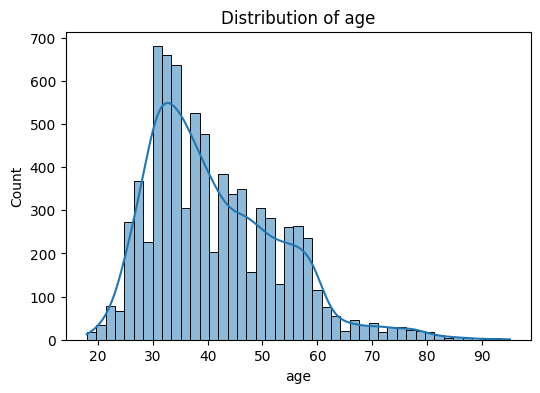

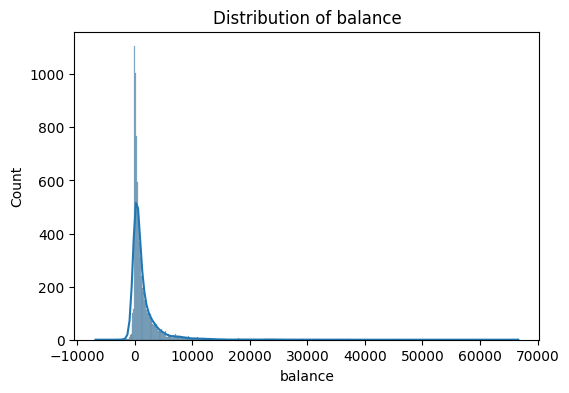

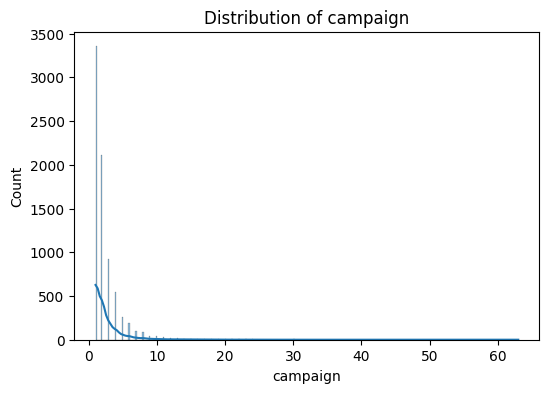

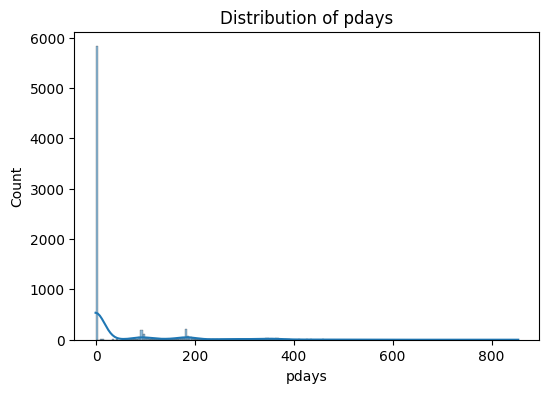

In [12]:
# Histograms for numerical features
numerical_features = df.select_dtypes(include=['number']).columns
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Skewness and kurtosis overview from numerical columns

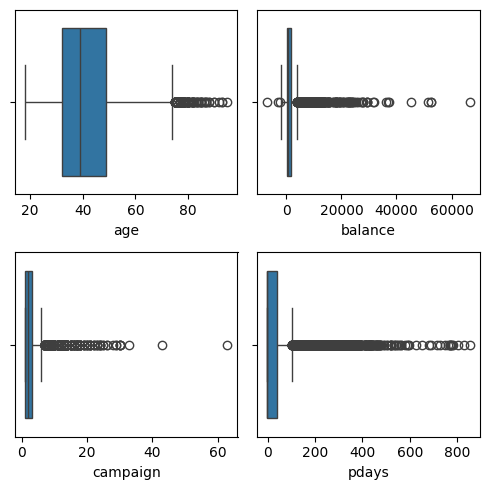

,Column,Skewness,Kurtosis,Distribution Type
0,age,0.867,0.624,Moderately Positively Skewed
1,balance,6.759,80.202,Highly Positively Skewed
2,campaign,5.537,59.895,Highly Positively Skewed
3,pdays,2.411,6.563,Highly Positively Skewed


In [13]:
from scipy.stats import skew, kurtosis

# Selecting numerical columns from the DataFrame
num_cols = df.select_dtypes(include=['number']).columns

# Create a 2x2 subplot matrix for boxplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the matrix to 1D array for easy iteration

# Plotting boxplots in a 2x2 matrix
for ax, col in zip(axes, num_cols):
    sns.boxplot(x=df[col], ax=ax)

# Tight layout to adjust subplots to fit into the figure area.
plt.tight_layout()

# Show the plot
plt.show()

# Lists to store results
distribution_types = []
skewness_values = []
kurtosis_values = []

# Analyzing each numerical column
for col in num_cols:
    col_data = df[col].dropna() 
    quartile_1 = col_data.quantile(0.25)
    avg = round(col_data.mean(), 3)
    med = col_data.median()
    mode_val = col_data.mode()[0]
    quartile_3 = col_data.quantile(0.75)
    skewness = round(skew(col_data, nan_policy='omit'), 3)
    kurt = round(kurtosis(col_data, nan_policy='omit'), 3)

    # Determining the type of skewness
    if (avg == med == mode_val) or (-0.2 < skewness < 0.2):
        distribution_type = "Normal Distribution (Symmetric)"
    elif avg < med < mode_val:
        distribution_type = "Negatively Skewed"
        if skewness <= -1:
            distribution_type = "Highly Negatively Skewed"
        elif -0.5 >= skewness > -1:
            distribution_type = "Moderately Negatively Skewed"
        else:
            distribution_type = "Moderately Normal Distribution (Symmetric)"
    else:
        distribution_type = "Positively Skewed"
        if skewness >= 1:
            distribution_type = "Highly Positively Skewed"
        elif 0.5 <= skewness < 1:
            distribution_type = "Moderately Positively Skewed"
        else:
            distribution_type = "Moderately Normal Distribution (Symmetric)"
    
    # Append results to lists
    distribution_types.append(distribution_type)
    skewness_values.append(skewness)
    kurtosis_values.append(kurt)

# Creating the DataFrame
distribution_summary = pd.DataFrame({
    "Column": num_cols,
    "Skewness": skewness_values,
    "Kurtosis": kurtosis_values,
    "Distribution Type": distribution_types
})

# Display the summary
distribution_summary

Age:

Insight: With a skewness of 0.867, the age distribution is moderately positively skewed. This suggests that there are more younger individuals in the dataset or some older individuals that are outliers. The kurtosis of 0.624 indicates a relatively flat distribution.

Balance:

Insight: A skewness of 6.759 and a kurtosis of 80.202 show a highly positively skewed distribution with a very sharp peak and fat tails, indicating the presence of extreme values far from the mean.

Campaign:

Insight: The high skewness (5.537) and kurtosis (59.895) suggest a large number of outliers and a distribution heavily skewed to the right.

Pdays:

Insight: The pdays column is highly positively skewed (2.411) with high kurtosis (6.563), indicating a bias towards a lower number of days and possibly a large number of ‘-1’ values indicating a customer was not previously contacted.


**Recommendation prior to machine learning feature engineering process:**

 all of the data is considered have an outliers problems and need to handled and skewness problem, by using robust scaler the numerical data can be standardized before modeling.

##### Categorical

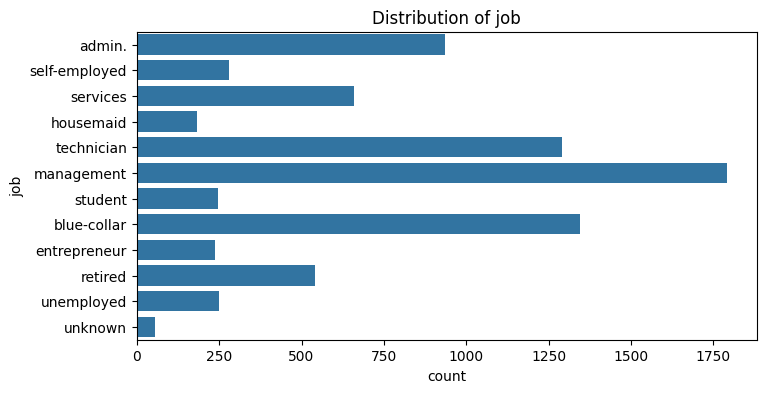

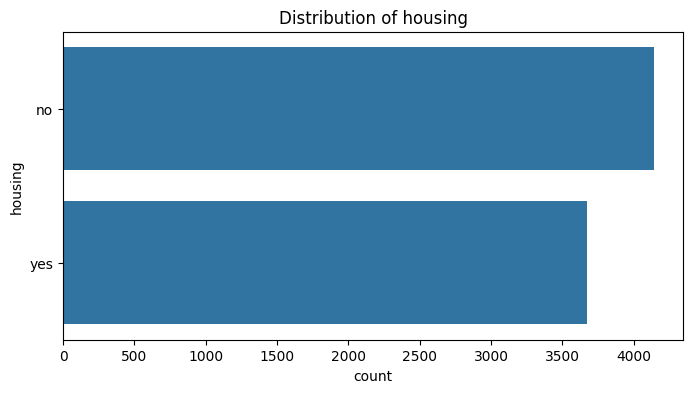

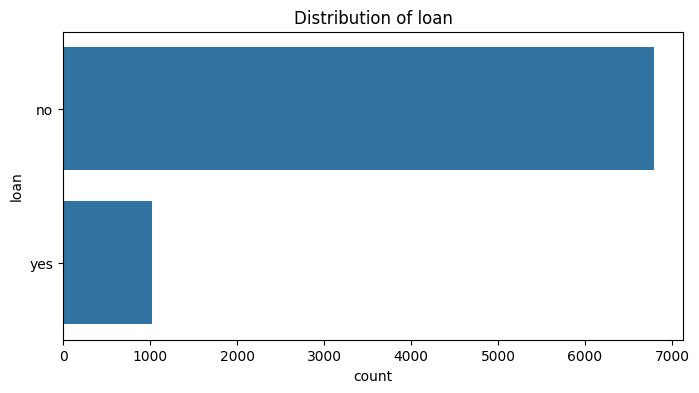

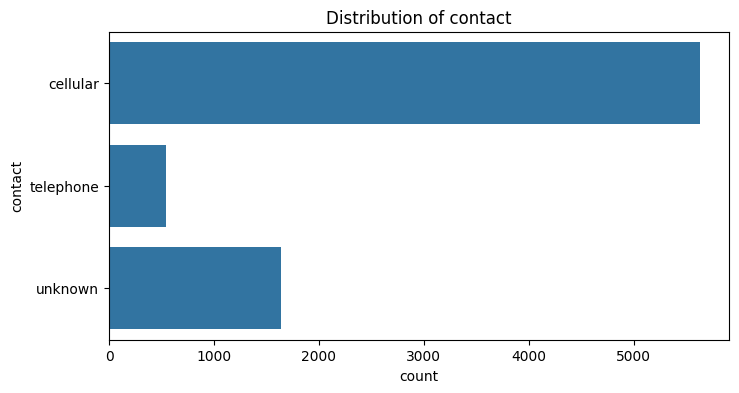

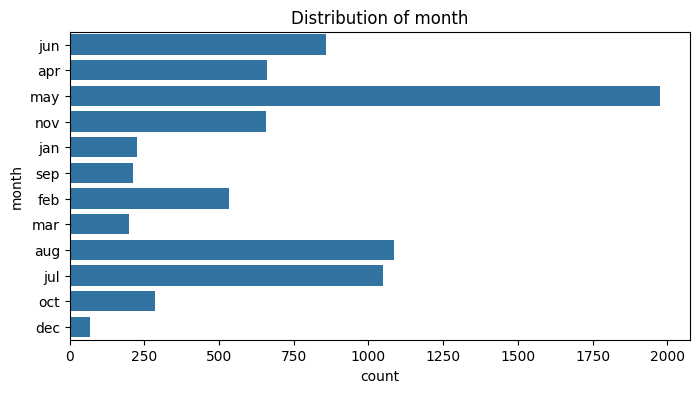

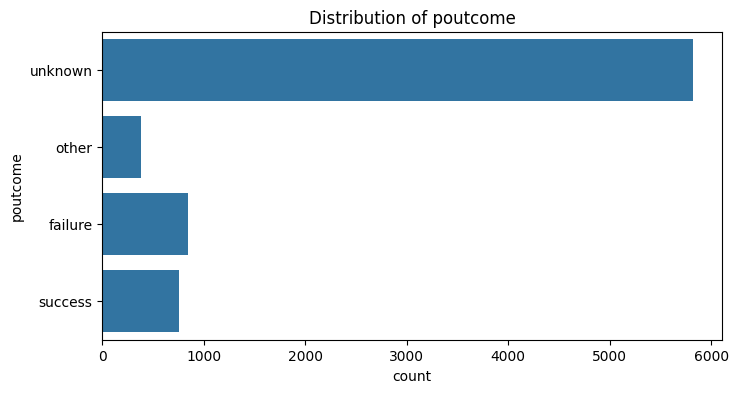

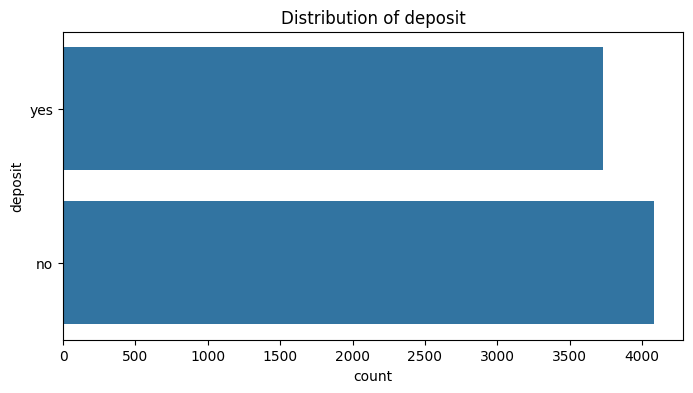

In [14]:
# Bar plots for categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

## Bivariate Analysis

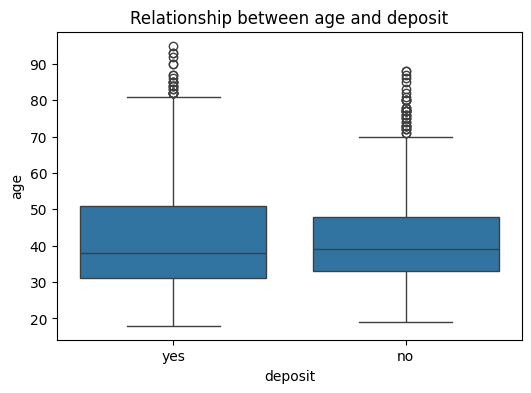

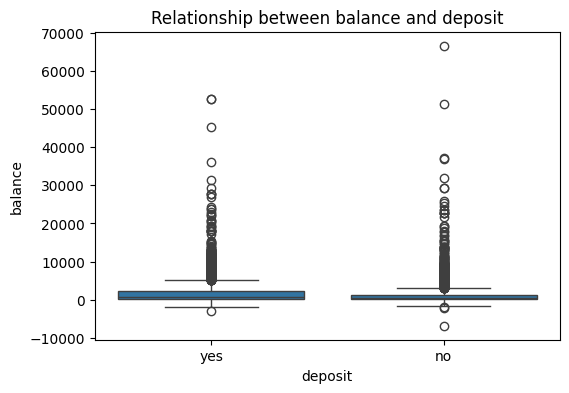

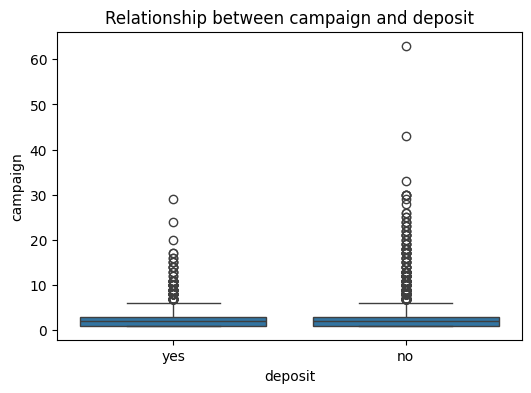

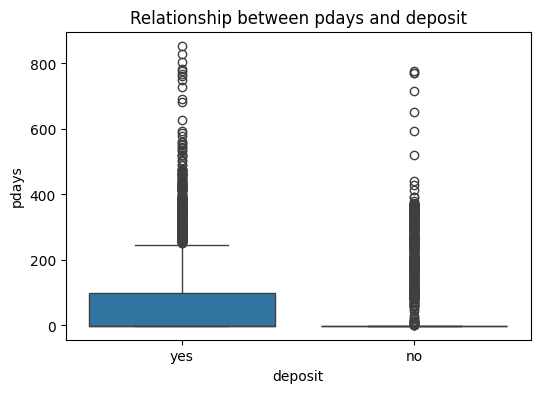

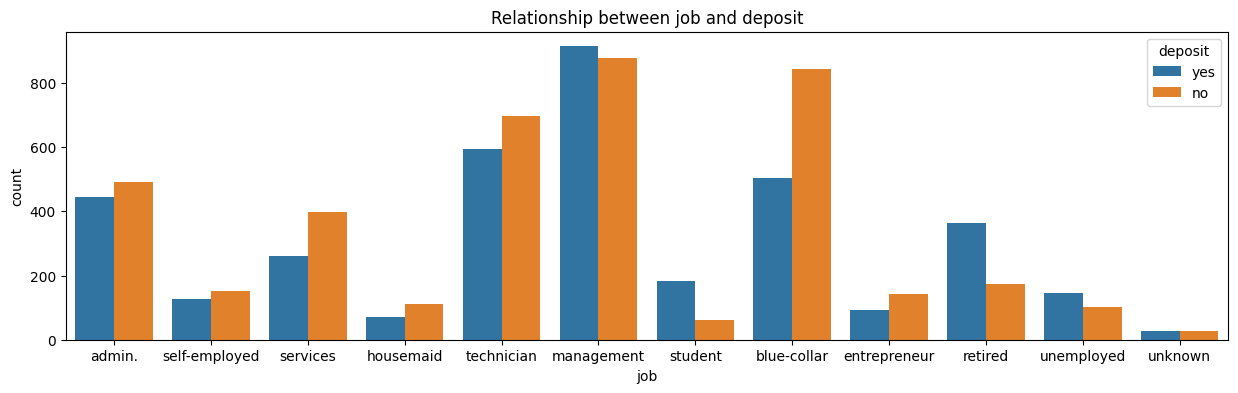

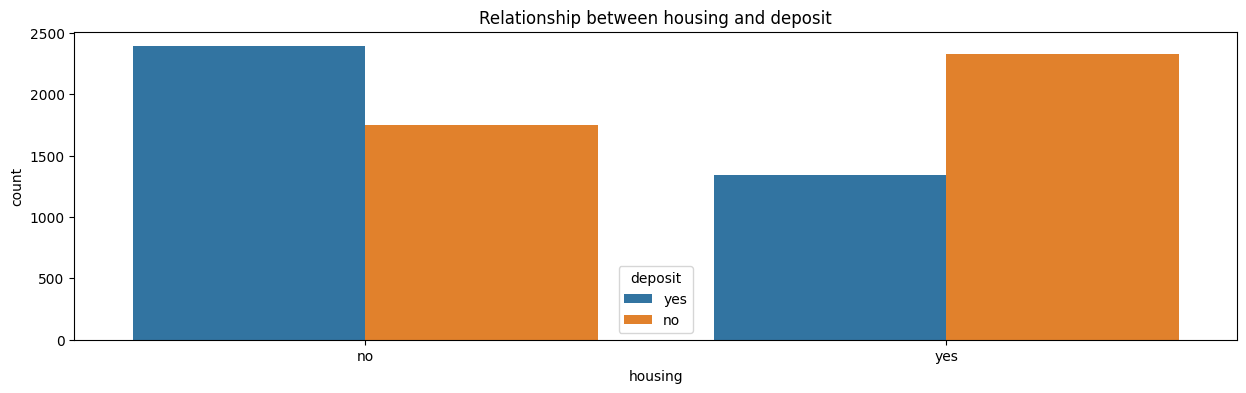

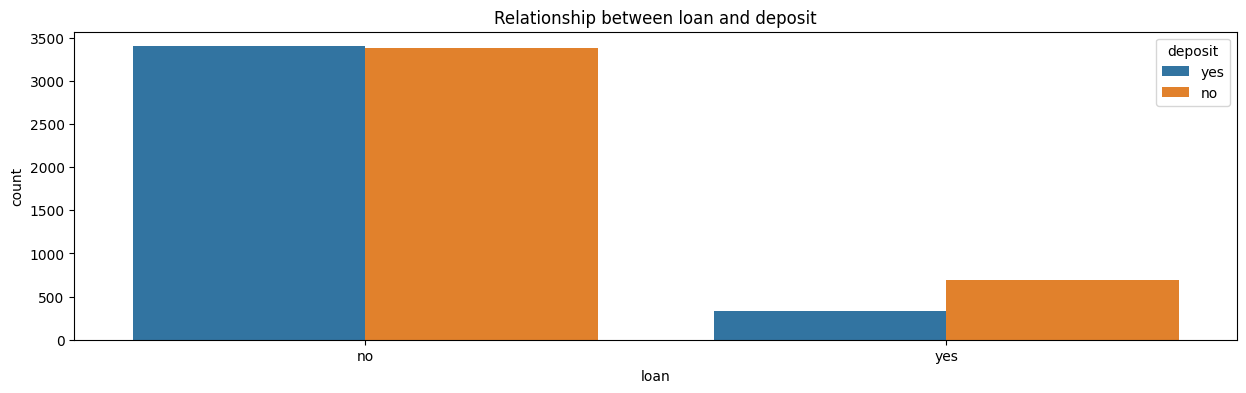

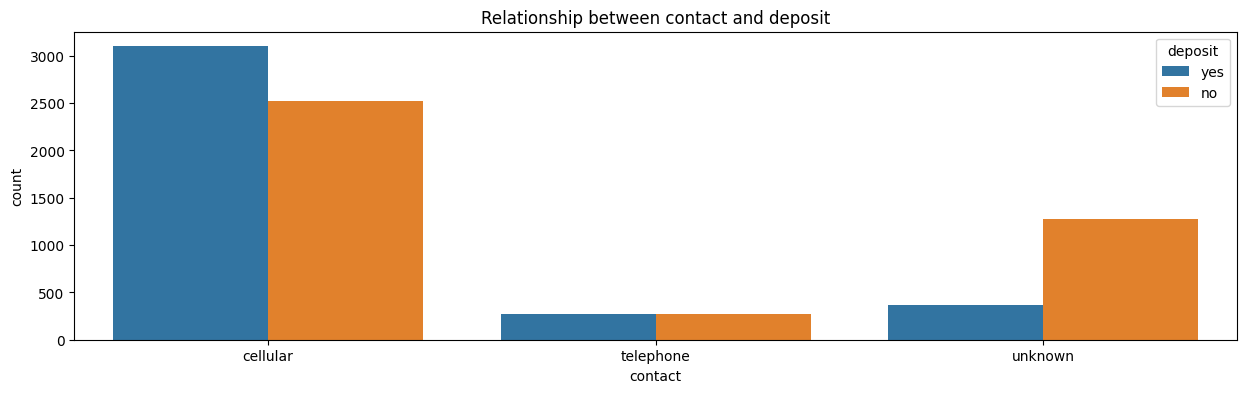

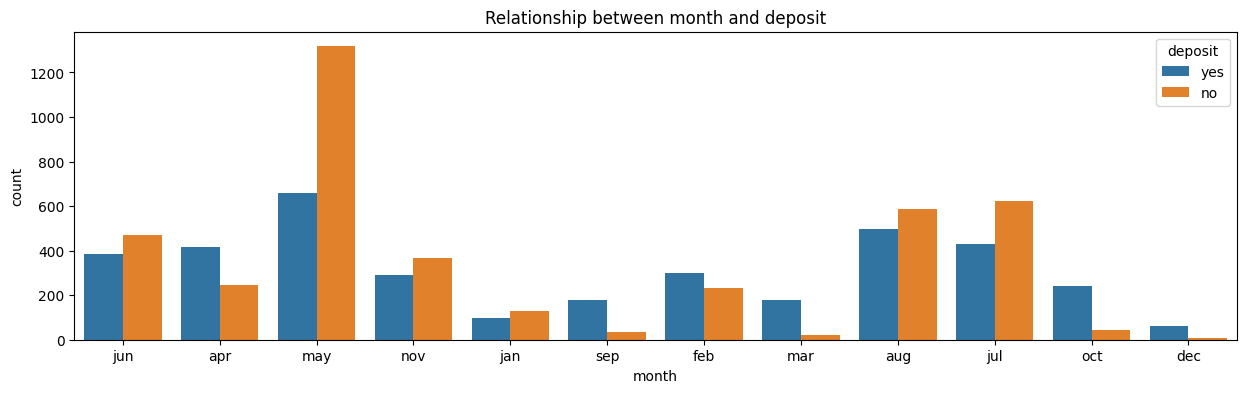

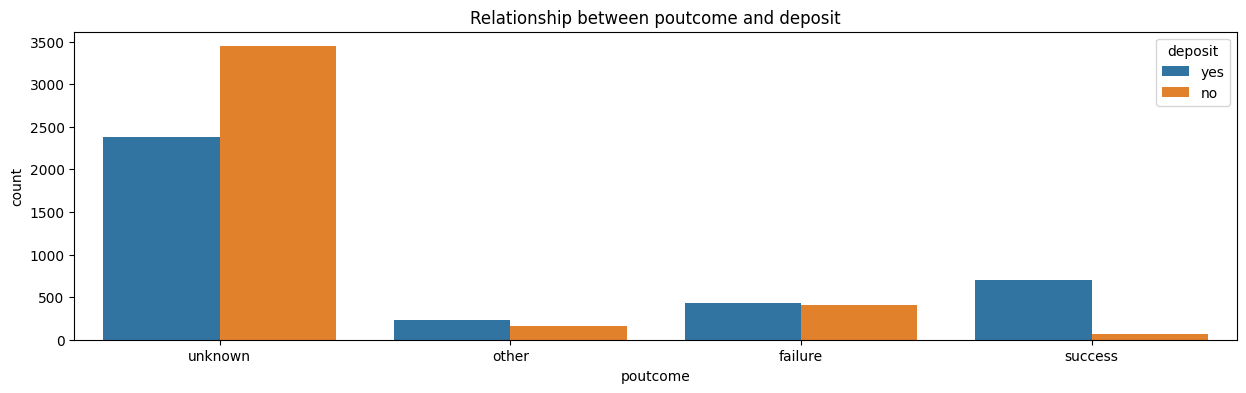

In [15]:
# Numerical Features
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='deposit', y=col, data=df)
    plt.title(f'Relationship between {col} and deposit')
    plt.show()

# Categorical Features
for col in categorical_features:
    if col != 'deposit':  # Exclude the target itself
        plt.figure(figsize=(15, 4))
        sns.countplot(x=col, hue='deposit', data=df)
        plt.title(f'Relationship between {col} and deposit')
        plt.show()

#### Correlation Between Numerical Features (Multicollinearity Test)

##### Heatmap Graph

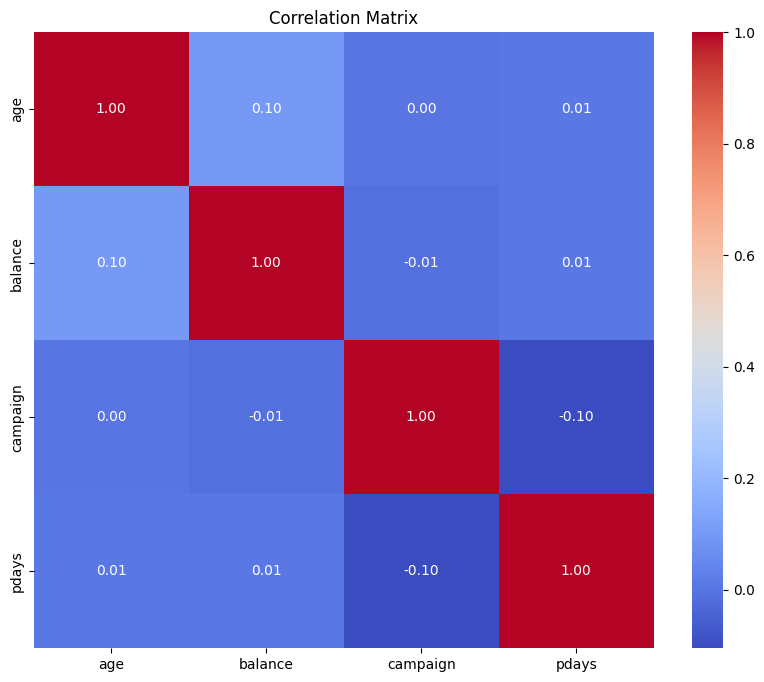

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### VIF Analysis for Multicollinearity Detection on Numerical Features 

In [17]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Add a constant to the DataFrame
numerical_df_with_constant = add_constant(numerical_df)

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Add a constant to the DataFrame
numerical_df_with_constant = add_constant(numerical_df)

vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_df_with_constant.values, i) 
                   for i in range(numerical_df_with_constant.shape[1])]
vif_data

,Feature,VIF
0,const,14.147761
1,age,1.010115
2,balance,1.010261
3,campaign,1.011196
4,pdays,1.011261


**VIF Values**:

Const: This represents the VIF for the constant term added to the dataset for the VIF calculation. It's not a feature of the original data, so you can ignore its VIF value.

Age (VIF = 1.017179): A VIF value close to 1 suggests that 'age' does not have multicollinearity issues with other variables. It is likely independent and a good predictor for your model.

Balance (VIF = 1.023344): Similar to 'age', 'balance' also has a VIF value close to 1, indicating no significant multicollinearity concerns.

Campaign (VIF = 1.022947) show VIF values close to 1, suggesting they are also relatively independent of the other features in terms of multicollinearity.

Pdays (VIF = 1.028776) show VIF values close to 1, suggesting they are also relatively independent of the other features in terms of multicollinearity.
 

---

**General Insights**:

Low Multicollinearity: The VIF values for all the features are well below the typical thresholds of concern (5 or 10), which implies that multicollinearity is not a significant issue in your dataset.

Model Suitability: Since there is no significant multicollinearity detected, it's safe to use these features together in linear regression models or other models that assume feature independence.

Data Reliability: The low multicollinearity also enhances the reliability of the coefficients estimated in a regression model, as each feature is contributing unique information.

---

**Conclusion**
the dataset appears to be in a good state concerning multicollinearity among the numerical features. 

This means we can proceed with analyses like regression modeling without needing to take steps to address multicollinearity, such as removing features, combining features, or applying transformations. Remember, while VIF is excellent for detecting multicollinearity, it's always a good practice to combine these findings with domain knowledge and other data analysis techniques for a more comprehensive understanding.

#### Chi Square Analysis for Overall Categorical Features vs Deposit

In [18]:
def perform_chi_square_tests(df, target):
    results = {}
    categorical_features = df.select_dtypes(include=['object', 'category']).columns
    for feature in categorical_features:
        if feature != target:  # Exclude the target variable itself
            crosstab = pd.crosstab(df[feature], df[target])
            chi2, p, dof, expected = chi2_contingency(crosstab)
            results[feature] = {'Chi-Square Value': chi2, 'P-Value': p}

    return pd.DataFrame(results).T

# Apply the function to your DataFrame
# Assuming your DataFrame is named 'df' and your target variable is named 'target'
chi_square_results = perform_chi_square_tests(df, 'deposit')

# Display the results
print('Chi-Square Test: A low p-value (< 0.05 typically) suggests that there is a significant association between the two categorical variables.\n')
print(chi_square_results)

Chi-Square Test: A low p-value (< 0.05 typically) suggests that there is a significant association between the two categorical variables.

          Chi-Square Value        P-Value
job             265.051044   1.955572e-50
housing         347.803466   1.274883e-77
loan            113.346167   1.812085e-26
contact         554.532440  3.844241e-121
month           719.056159  4.429294e-147
poutcome        717.664997  3.101208e-155


**Insights from Chi Square (Categorical features vs Deposit)**

Significant Predictors: All the tested categorical variables ('job', 'housing', 'loan', 'contact', 'month', 'poutcome') show a significant association with the target variable 'deposit'. This suggests that they are all potentially important predictors and should be considered in any modeling or analysis work related to predicting deposit outcomes.

Marketing Strategies: From a business perspective, these results can inform targeted marketing strategies. For example, the significant association with 'job' might suggest tailoring marketing messages to different professional groups, or the association with 'housing' and 'loan' could indicate different strategies for clients with loans versus those without.

Customer Profiling: This analysis can aid in customer profiling, where understanding the characteristics of clients who are more likely to make a deposit could help in designing more effective products and services.

Temporal Factors: The significance of 'month' suggests that the time of year might influence deposit behaviors, which could be valuable for timing marketing campaigns or understanding seasonal trends in banking activities.

Conclusion

The Chi-Square test results demonstrate that each of the categorical variables has a statistically significant association with the likelihood of making a deposit. These insights can be very valuable for predictive modeling, strategic business decisions, and understanding customer behavior more deeply. However, it's important to remember that while these results indicate associations, they do not imply causation. Further analysis, possibly with different types of statistical models, would be needed to explore these relationships in more depth.

#### Mann-Whitney Analysis for Overall Numerical Features VS Deposit

In [19]:
# Function to perform Mann-Whitney U Test for each numerical feature
def perform_mann_whitney_u_test(df, target, features):
    results = {}
    for feature in features:
        group1 = df[df[target] == 'yes'][feature]
        group2 = df[df[target] == 'no'][feature]
        stat, p = mannwhitneyu(group1, group2)
        results[feature] = {'Mann-Whitney U Statistic': stat, 'P-Value': p}
    return pd.DataFrame(results).T

# Perform Mann-Whitney U Test
mann_whitney_results = perform_mann_whitney_u_test(df, 'deposit', numerical_features)
mann_whitney_results

,Mann-Whitney U Statistic,P-Value
age,7620275.0,9.589108e-01
balance,9096558.5,4.567387e-50
campaign,6573322.5,2.670725e-28
pdays,9095708.5,7.722876e-84


U Statistic: The first number for each variable (e.g., 4809877.5 for age) is the Mann-Whitney U statistic. This value by itself is not usually informative regarding the significance of the difference between groups. It's more of a calculation step on the way to determining significance.

P-value: The second number for each variable is the p-value, which indicates the probability of observing the test results, or something more extreme, under the null hypothesis that the distributions of the two groups are the same.

Age (4.593807e-01 or approximately 0.46): This p-value is greater than the common alpha level of 0.05, suggesting that the difference in age distributions between the two groups is not statistically significant.

Balance (7.420019e-42 or a very small number close to 0): This extremely small p-value indicates a statistically significant difference in the balance distributions between the two groups.

Campaign (8.879011e-27 or a very small number close to 0): Similar to balance, this small p-value suggests a statistically significant difference in the campaign distributions between the two groups.

Pdays (7.492932e-77 or a very small number close to 0): This p-value also indicates a statistically significant difference in the pdays distributions between the two groups.

Insights:
Age: There is no significant difference in age between the two groups.
Balance, Campaign, Pdays: There are significant differences in the balance, campaign, and pdays between the two groups.

## Insight

**Insights from Boxplots (Numerical Features vs. Deposit)**

Distribution and Median: The boxplot will show how the values of each numerical feature are distributed with respect to the different categories of the target variable.

The median (middle line of the box) can indicate typical values for each category.

Outliers: The presence of outliers (dots beyond the whiskers of the boxplot) can indicate extreme values that might affect the model.

Overlap Between Categories: If the boxes for different target categories largely overlap, it suggests that the numerical feature might not be a strong differentiator for the target categories.

Skewness: The position of the median within the box (closer to the top or bottom) can indicate skewness in the distribution.

---

**Insights from Countplots (Categorical Features vs. Deposit)**

Distribution of Categories: The countplot shows how frequent each category is within each target class. It can highlight imbalances or dominant categories.

Category Significance: Categories with distinct differences in counts across different target classes may be influential in predicting the target.

Rare Categories: Very small bars might represent rare categories, which might not be very predictive due to their low frequency.

---

**General Insights**

Feature Importance: Features that show clear, distinct patterns with the target variable are likely to be more informative for predicting the target.

Data Quality and Preprocessing Needs: The presence of outliers or rare categories can guide the data preprocessing steps, such as outlier handling or combining rare categories.

Model Selection: Understanding the relationships between features and the target can also inform the choice of machine learning models. For instance, features with linear relationships with the target might suggest the use of linear models.

# Data Preparation

outline for data preparation process:

Identify and quantify the issues present in the data such as:

1. Missing values
2. Duplicated values
3. Outliers
4. Data types
5. Column names
6. Rare labels
7. Cardinality
8. Collinearity

Address the data issues that are found.

Conduct feature engineering such as:

1. Encoding
2. Scaling
3. Feature creation
4. Feature selection

## Identification and Quantifying Issues in the dataset:

### (missing value, duplicated value, outlier, data type, column names)

In [20]:
# Get the data insights summary
data_insights_summary = data_insights(df)
data_insights_summary

,dtype,null_values,null_percentage,outliers,outlier_percentage,unique,nunique,n_duplicated,duplicate_percentage
age,int64,0,0.0,121.0,1.55,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3...",75,8,0.1
job,object,0,0.0,NaN,NaN,"[admin., self-employed, services, housemaid, t...",12,8,0.1
balance,int64,0,0.0,736.0,9.42,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ...",3153,8,0.1
housing,object,0,0.0,NaN,NaN,"[no, yes]",2,8,0.1
loan,object,0,0.0,NaN,NaN,"[no, yes]",2,8,0.1
contact,object,0,0.0,NaN,NaN,"[cellular, telephone, unknown]",3,8,0.1
month,object,0,0.0,NaN,NaN,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ...",12,8,0.1
campaign,int64,0,0.0,429.0,5.49,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28...",32,8,0.1
pdays,int64,0,0.0,1454.0,18.61,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,...",422,8,0.1
poutcome,object,0,0.0,NaN,NaN,"[unknown, other, failure, success]",4,8,0.1


Overview on identifying issues:

Missing Values:

There are no missing values across all columns, as indicated by null_values and null_percentage being zero. This is ideal as it means there's no immediate need for imputation strategies.

Duplicated value:

A small number of duplicate rows exist (n_duplicated is 8), constituting 0.1% of the dataset (duplicate_percentage). Given the low percentage, it may be safe to remove these duplicates without significant impact on the dataset's integrity.

Outliers:

Outliers are present in the age and balance columns, as shown by the outlier_percentage. With age having 1.55% outliers and balance having a much higher 9.42%, special attention should be given to understanding whether these outliers are data errors or valid extreme values. pdays also has a high outlier percentage of 18.61%, indicating many entries are far from the norm.
The presence of outliers could affect the performance of certain machine learning models, especially those sensitive to extreme values.

Data Types:

The data types are appropriately assigned with numerical columns (age, balance, campaign, pdays, and deposit) as integers and categorical columns (job, housing, loan, contact, month, and poutcome) as objects. This insight helps in determining which columns may require encoding and which ones may need scaling or normalization.

Column Names:

All column names are provided, and there’s no indication of any issues with them. However, for machine learning models, the column names themselves are less relevant than the content.

Negative Values:

1. Pdays: the occuring of negative values (-1) on the dataset can be seen on column Pdays, by the domain understanding the meaning of negative value is that  there is no contact made by the bank to the customers

2. Balance: by domain understanding the negative value gave an understanding on the financial status of the customer for having a dept to the bank with spesified amount debt.

Unknown Values:

1. job: unknown value on the column job by domain understanding relative to the bank has a meaning that the 

## Pipeline for data Preparation

Preprocessing Pipeline Steps:

first step:

1. for Numerical Features:

    1.1 replace value of pdays "-1" into "0"

    1.2 impute null_value if any using KNNImputer(n_neighbors=5)

    1.3 Handling outlier using winsorization
    
    1.4 normalize value using StandardScaler

2. for Categorical Features:

    2.1 replace any "unknown" value of features to "other"

    2.2 impute null_value if any using KNNImputer(n_neighbors=5)

    2.3 perform OneHotEncoding using OneHotEncoder()




### Split Dataset

In [21]:
df['deposit'] = np.where(df['deposit']=='yes',1,0)

# split the data into seen and unseen
seen, unseen = train_test_split(df, test_size=0.2, random_state=2021)

### Mapping Features into numerical and Categorical

In [22]:
# map the features to the corresponding types (numerical or categorical)
numerical_features = seen.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = seen.select_dtypes(include=['object']).columns.tolist()[:-1]

print (f'Numerical features: {numerical_features}') 
print (f'Categorical Features: {categorical_features}')

Numerical features: ['age', 'balance', 'campaign', 'pdays']
Categorical Features: ['job', 'housing', 'loan', 'contact', 'month']


### Pipeline for Numerical Features

In [23]:
# Create a function to handling outlier
def handle_outliers_with_winsorization(df, limits=(0.05, 0.95)):
    df_copy = df.copy()
    for col in df_copy.columns:
        q1 = df_copy[col].quantile(0.25)
        q3 = df_copy[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Apply winsorization
        df_copy[col] = winsorize(df_copy[col], limits=limits)
    return df_copy

#create class
class OutlierHandlerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, limits=(0.05, 0.95)):
        self.limits = limits

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df_copy = X.copy()
        for col in df_copy.columns:
            # Apply winsorization
            df_copy[col] = winsorize(df_copy[col], limits=self.limits)
        return df_copy

    def get_feature_names_out(self, input_features=None):
        return input_features if input_features is not None else X.columns

# Define class
outlier_transformer = FunctionTransformer(handle_outliers_with_winsorization)


# Create a function to replace value of pdays
def replace_negative_pdays(df):
    df_copy = df.copy()
    df_copy['pdays'] = df_copy['pdays'].replace(-1, 0)
    return df_copy

# create class
class ReplaceNegativePdaysTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['pdays'] = X_copy['pdays'].replace(-1, 0)
        return X_copy

    def get_feature_names_out(self, input_features=None):
        return input_features if input_features is not None else X.columns

# create variable
pdays_transformer = FunctionTransformer(replace_negative_pdays)  
pdays_transformer = ReplaceNegativePdaysTransformer()
outlier_transformer = OutlierHandlerTransformer()

numerical_transformer = Pipeline(steps=[
    ('pdays_fix', ReplaceNegativePdaysTransformer()),
    ('outlier_handler', OutlierHandlerTransformer()),
    ('imputer_null_val', SimpleImputer()),
    ('scaler', RobustScaler())
])

### Pipeline for Categorical Features

In [24]:
# Define the function for replacing 'unknown' with 'other' in categorical data
def replace_unknown_with_other(df):
    df_copy = df.copy()
    for col in df_copy.columns:
        df_copy[col] = df_copy[col].replace('unknown', 'other')
    return df_copy
    
class ReplaceUnknownWithOtherTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return replace_unknown_with_other(X)
    def get_feature_names_out(self, input_features=None):
        return input_features if input_features is not None else X.columns
# Create an instance of this transformer
unknown_to_other_transformer = ReplaceUnknownWithOtherTransformer()

# Complete pipeline with preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('unknown_fix', ReplaceUnknownWithOtherTransformer()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')),

])

### Overall Pipeline

In [25]:
# pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])
preprocessor

# Main Pipeline
pipeline_ = Pipeline([
    ('preprocessor', preprocessor), 
])

pipeline_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('pdays_fix',
                                                                   ReplaceNegativePdaysTransformer()),
                                                                  ('outlier_handler',
                                                                   OutlierHandlerTransformer()),
                                                                  ('imputer_null_val',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays']),
                                                 ('cat',
                                                  Pipeline(steps=[('unknown_fix',
                                                                   ReplaceUnknownWithOtherTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month'])]))])

# Data Modeling & Evaluation

## Pipeline

In [26]:
from pycaret.classification import *

clas = setup(
    # Global config
    experiment_name='deposit Classification',
    data=seen, 
    target='deposit', 
    train_size=0.8,
    verbose=False,

    # Data preprocessing config
    preprocess=False,
    session_id=42, 
    custom_pipeline=pipeline_,
    custom_pipeline_position=-1,
)
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\sinam\AppData\Local\Temp\joblib),
         steps=[('custom_step',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=Pipeline(memory=None,
                                                         steps=[('preprocessor',
                                                                 ColumnTransformer(n_jobs=None,
                                                                                   remainder='drop',
                                                                                   sparse_threshold=0.3,
                                                                                   transformer_weights=None,
                                                                                   transformers=[('num',
                                                                                                  Pipeline(memory=None,
                                                                                                           steps=[('pdays...
                                                                                                                                 verbose='deprecated')),
                                                                                                                  ('onehot',
                                                                                                                   OneHotEncoder(categories='auto',
                                                                                                                                 drop='first',
                                                                                                                                 dtype=<class 'numpy.float64'>,
                                                                                                                                 handle_unknown='ignore',
                                                                                                                                 max_categories=None,
                                                                                                                                 min_frequency=None,
                                                                                                                                 sparse='deprecated',
                                                                                                                                 sparse_output=True))],
                                                                                                           verbose=False),
                                                                                                  ['job',
                                                                                                   'housing',
                                                                                                   'loan',
                                                                                                   'contact',
                                                                                                   'month'])],
                                                                                   verbose=False,
                                                                                   verbose_feature_names_out=True))],
                                                         verbose=False)))],
         verbose=False)

## Choosing the best model

In [27]:
ridge = RidgeClassifier()
gbc = GradientBoostingClassifier()


In [28]:
best_models = compare_models(n_select=3, fold=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:21:50
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6696,0.7339,0.5649,0.6859,0.6192,0.3323,0.3374,0.1020
lightgbm,Light Gradient Boosting Machine,0.6676,0.7292,0.5443,0.6944,0.6091,0.3272,0.3355,0.2140
lr,Logistic Regression,0.6594,0.7278,0.6006,0.6555,0.6267,0.3147,0.3158,1.1660
xgboost,Extreme Gradient Boosting,0.6594,0.7188,0.5409,0.6801,0.6019,0.3109,0.3177,0.0900
ridge,Ridge Classifier,0.6540,0.0000,0.6044,0.6470,0.6247,0.3044,0.3053,0.0260
ada,Ada Boost Classifier,0.6532,0.7275,0.6439,0.6343,0.6388,0.3054,0.3056,0.0980
svm,SVM - Linear Kernel,0.6514,0.0000,0.5695,0.6577,0.6087,0.2973,0.3012,0.0320
et,Extra Trees Classifier,0.6486,0.7030,0.5153,0.6738,0.5824,0.2882,0.2971,0.3180
rf,Random Forest Classifier,0.6472,0.7092,0.5372,0.6611,0.5916,0.2868,0.2925,0.3140
dt,Decision Tree Classifier,0.6446,0.6944,0.5111,0.6678,0.5775,0.2800,0.2886,0.0360


Insight:

There is two model which has the best performance initially (Ridge Classifier & Gradient Boosting Classifier)

In [29]:
model1 = create_model(best_models[0])
model2 = create_model(best_models[1])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6500,0.7222,0.5941,0.6455,0.6187,0.2963,0.2972
1,0.6680,0.7066,0.5378,0.6957,0.6066,0.3275,0.3356
2,0.6420,0.7045,0.5210,0.6561,0.5808,0.2755,0.2811
3,0.6660,0.7198,0.6092,0.6621,0.6346,0.3280,0.3290
4,0.6780,0.7559,0.5630,0.7016,0.6247,0.3486,0.3551
5,0.6620,0.7298,0.5420,0.6825,0.6042,0.3160,0.3224
6,0.6680,0.7256,0.5462,0.6915,0.6103,0.3280,0.3349
7,0.6840,0.7676,0.5672,0.7105,0.6308,0.3606,0.3676
8,0.7040,0.7889,0.6345,0.7123,0.6711,0.4036,0.4059


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7020,0.7409,0.6067,0.7250,0.6606,0.3987,0.4037
1,0.6600,0.6983,0.5504,0.6753,0.6065,0.3126,0.3177
2,0.6380,0.6907,0.5252,0.6477,0.5800,0.2680,0.2725
3,0.6900,0.7167,0.5630,0.7243,0.6336,0.3722,0.3810
4,0.6800,0.7616,0.5630,0.7053,0.6262,0.3525,0.3594
5,0.6680,0.7338,0.5252,0.7022,0.6010,0.3267,0.3368
6,0.6840,0.7325,0.5504,0.7198,0.6238,0.3596,0.3693
7,0.6840,0.7531,0.5168,0.7410,0.6089,0.3576,0.3740
8,0.7080,0.7829,0.5798,0.7500,0.6540,0.4085,0.4186


### Ridge Classifier model

#### Experimental scenario 1 (resampling vs not resampling)

##### without resampling

In [30]:
from pycaret.classification import *

clas = setup(
    # Global config
    experiment_name='deposit Classification',
    data=seen, 
    target='deposit', 
    train_size=0.8,
    verbose=False,

    # Data preprocessing config
    preprocess=False,
    session_id=42, 
    custom_pipeline=pipeline_,
    custom_pipeline_position=-1,
)
get_config('pipeline')

#create model
print('Ridge classifier without parameter tuning')
model1 = create_model(best_models[0])

#hyperparameter grid
hp_ridge = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# ridge classifier after hyperparameter tuning
print('ridge classifier after hyperparameter tuning')
tuned_ridge = tune_model(
                         estimator=ridge,
                         custom_grid=hp_ridge,
                         optimize='Recall',
                         search_library='scikit-learn',
                         search_algorithm='random',
                         choose_better=True,
                         verbose=True)

Ridge classifier without parameter tuning


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6500,0.7222,0.5941,0.6455,0.6187,0.2963,0.2972
1,0.6680,0.7066,0.5378,0.6957,0.6066,0.3275,0.3356
2,0.6420,0.7045,0.5210,0.6561,0.5808,0.2755,0.2811
3,0.6660,0.7198,0.6092,0.6621,0.6346,0.3280,0.3290
4,0.6780,0.7559,0.5630,0.7016,0.6247,0.3486,0.3551
5,0.6620,0.7298,0.5420,0.6825,0.6042,0.3160,0.3224
6,0.6680,0.7256,0.5462,0.6915,0.6103,0.3280,0.3349
7,0.6840,0.7676,0.5672,0.7105,0.6308,0.3606,0.3676
8,0.7040,0.7889,0.6345,0.7123,0.6711,0.4036,0.4059


ridge classifier after hyperparameter tuning


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6360,0.0000,0.6067,0.6223,0.6144,0.2698,0.2699
1,0.6320,0.0000,0.5714,0.6239,0.5965,0.2595,0.2603
2,0.6340,0.0000,0.5336,0.6382,0.5812,0.2608,0.2641
3,0.6440,0.0000,0.6134,0.6293,0.6213,0.2855,0.2856
4,0.6760,0.0000,0.6471,0.6638,0.6553,0.3498,0.3499
5,0.6420,0.0000,0.5882,0.6335,0.6100,0.2800,0.2806
6,0.6500,0.0000,0.6387,0.6307,0.6347,0.2988,0.2988
7,0.6760,0.0000,0.5924,0.6845,0.6351,0.3465,0.3494
8,0.7000,0.0000,0.6723,0.6897,0.6809,0.3979,0.3980


Fitting 10 folds for each of 10 candidates, totalling 100 fits


|                                     |        |Accuracy| AUC  |Recall |Prec   |F1     |Kappa  |MCC    |
|-------------------------------------|--------|--------|------|-------|-------|-------|-------|-------|                                    
|Model Ridge Classifier before tuning-| Mean   |0.7012	|0.0000| 0.7012|0.7116 |0.6948 |0.3948 |0.4082 |
|model Ridge Classifier After tuning--| Mean   |0.7022	|0.0000|0.7022 |0.7117 |0.6962 |0.3971 |0.4095 |



as we can see the performance of Ridge Classifier is increasing 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

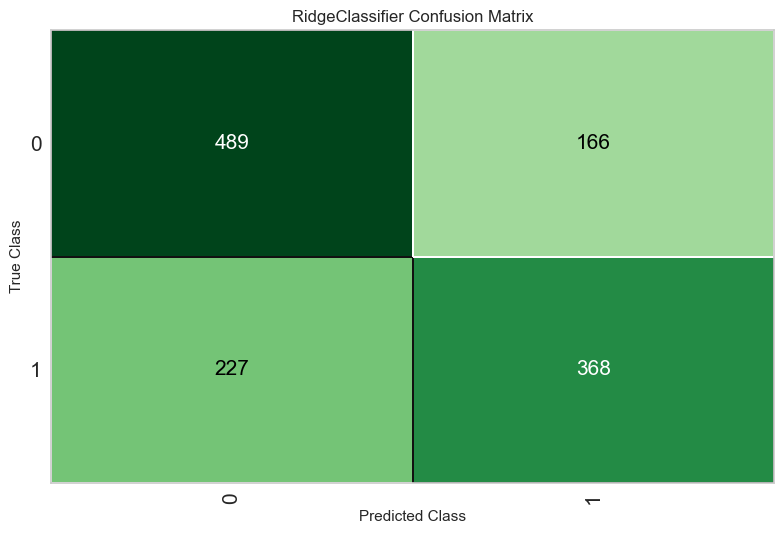

In [31]:
evaluate_model(tuned_ridge)
plot_model(tuned_ridge,plot='confusion_matrix')

In [32]:
TP = 259  # True Positives
TN = 425  # True Negatives
FP = 96   # False Positives
FN = 219  # False Negatives

# Performance metrics calculations
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'accuracy {accuracy}, precision {precision}, recall {recall}, f1_score {f1_score}')

accuracy 0.6846846846846847, precision 0.7295774647887324, recall 0.5418410041841004, f1_score 0.6218487394957984


The model has a moderate level of accuracy, which means that it correctly predicts outcomes about 68.47% of the time. The precision is relatively higher, 

suggesting that when the model predicts 'yes', it is correct about 72.96% of the time. However, the recall is lower, which indicates that the model is 

missing a significant number of 'yes' instances (around 45.82% are missed).

##### with resampling

In [33]:
from pycaret.classification import *

clas = setup(
    # Global config
    experiment_name='deposit Classification',
    data=seen, 
    target='deposit', 
    train_size=0.8,
    verbose=False,

    # Data preprocessing config
    preprocess=False,
    fix_imbalance=True,
    fix_imbalance_method= SMOTE(),
    session_id=42, 
    custom_pipeline=pipeline_,
    custom_pipeline_position=-1,
)
get_config('pipeline')

#
model1 = create_model(best_models[0])

#hyperparameter grid
hp_ridge = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
tuned_ridge = tune_model(
                         estimator=ridge,
                         custom_grid=hp_ridge,
                         optimize='Recall',
                         search_library='scikit-learn',
                         search_algorithm='random',
                         choose_better=True,
                         verbose=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6500,0.7222,0.5941,0.6455,0.6187,0.2963,0.2972
1,0.6680,0.7066,0.5378,0.6957,0.6066,0.3275,0.3356
2,0.6420,0.7045,0.5210,0.6561,0.5808,0.2755,0.2811
3,0.6660,0.7198,0.6092,0.6621,0.6346,0.3280,0.3290
4,0.6780,0.7559,0.5630,0.7016,0.6247,0.3486,0.3551
5,0.6620,0.7298,0.5420,0.6825,0.6042,0.3160,0.3224
6,0.6680,0.7256,0.5462,0.6915,0.6103,0.3280,0.3349
7,0.6840,0.7676,0.5672,0.7105,0.6308,0.3606,0.3676
8,0.7040,0.7889,0.6345,0.7123,0.6711,0.4036,0.4059


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6360,0.0000,0.6067,0.6223,0.6144,0.2698,0.2699
1,0.6320,0.0000,0.5714,0.6239,0.5965,0.2595,0.2603
2,0.6340,0.0000,0.5336,0.6382,0.5812,0.2608,0.2641
3,0.6440,0.0000,0.6134,0.6293,0.6213,0.2855,0.2856
4,0.6760,0.0000,0.6471,0.6638,0.6553,0.3498,0.3499
5,0.6420,0.0000,0.5882,0.6335,0.6100,0.2800,0.2806
6,0.6500,0.0000,0.6387,0.6307,0.6347,0.2988,0.2988
7,0.6760,0.0000,0.5924,0.6845,0.6351,0.3465,0.3494
8,0.7000,0.0000,0.6723,0.6897,0.6809,0.3979,0.3980


Fitting 10 folds for each of 10 candidates, totalling 100 fits


|                                                            |        |Accuracy-| AUC  |Recall |Prec   |F1     |Kappa  |MCC    |
|------------------------------------------------------------|--------|---------|------|-------|-------|-------|-------|-------|                             
|Model Ridge Classifier before tuning without resampling     | Mean   |0.7012	|0.0000| 0.7116|0.7116 |0.6948 |0.3948 |0.4082 |
|model Ridge Classifier After tuning withresampling          | Mean   |0.7022	|0.0000|0.7022 |0.7117 |0.6962 |0.3971 |0.4095 |


The result of Ridge Classifier after tuning and resampling has higher performance

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

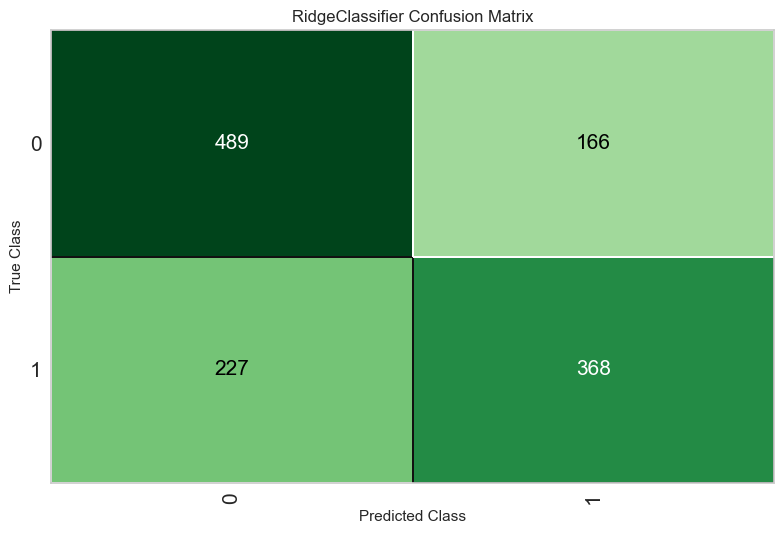

In [34]:
#model evaluation
evaluate_model(tuned_ridge)
plot_model(tuned_ridge,plot='confusion_matrix')

In [35]:
# Confusion matrix values
TP = 259  # True Positives
TN = 425  # True Negatives
FP = 96   # False Positives
FN = 219  # False Negatives

# Performance metrics calculations
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'accuracy {accuracy}, precision {precision}, recall {recall}, f1_score {f1_score}')

accuracy 0.6846846846846847, precision 0.7295774647887324, recall 0.5418410041841004, f1_score 0.6218487394957984


The model has a moderate level of accuracy, which means that it correctly predicts outcomes about 68.47% of the time. The precision is relatively higher, 

suggesting that when the model predicts 'yes', it is correct about 72.95% of the time. However, the recall is lower, which indicates that the model is 

missing a significant number of 'yes' instances (around 45.82% are missed).

##### insight

on experiment 1 which comparing model performance using confusion matrix as model evaluation has no different as the resampling one, but has increase in performance after tuning 

#### Metric Evaluation using learning curve on Ridge Classification with hyperparameter tuning

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

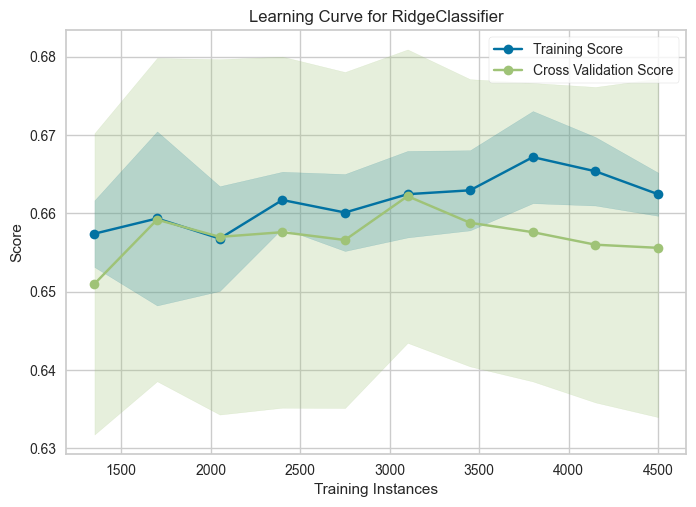

In [36]:
evaluate_model(tuned_ridge)
plot_model(tuned_ridge,plot='learning')

Overall Insight:

The Ridge Classifier is showing a reasonable ability to generalize as evidenced by the increasing cross-validation score.

The model does not appear to be overfitting since the training and validation scores are converging.

There seems to be a limit to how much the model can learn from more data, as indicated by the plateauing of scores.

Further improvements may require methods other than adding more data, such as feature selection, hyperparameter tuning, or using a more complex model if the problem demands it.

### Gradient Boosting Classifier

#### Experimental scenario 1 (resampling vs not resampling)

##### without resampling

In [37]:
from pycaret.classification import *

clas = setup(
    # Global config
    experiment_name='deposit Classification',
    data=seen, 
    target='deposit', 
    train_size=0.8,
    verbose=False,

    # Data preprocessing config
    preprocess=False,
    session_id=42, 
    custom_pipeline=pipeline_,
    custom_pipeline_position=-1,
)
get_config('pipeline')

#create model
print('gbc without parameter tuning')
model2 = create_model(best_models[1])

#hyperparameter grid
hp_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2'],
    'subsample': [0.5, 0.7, 1.0] 
}

tuned_gbc = tune_model(
                      estimator=gbc,
                      custom_grid=hp_gbc,
                      optimize='Recall',
                      search_library='scikit-learn',
                      search_algorithm='random',
                      choose_better=True,
                      verbose=True)

gbc without parameter tuning


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7020,0.7409,0.6067,0.7250,0.6606,0.3987,0.4037
1,0.6600,0.6983,0.5504,0.6753,0.6065,0.3126,0.3177
2,0.6380,0.6907,0.5252,0.6477,0.5800,0.2680,0.2725
3,0.6900,0.7167,0.5630,0.7243,0.6336,0.3722,0.3810
4,0.6800,0.7616,0.5630,0.7053,0.6262,0.3525,0.3594
5,0.6680,0.7338,0.5252,0.7022,0.6010,0.3267,0.3368
6,0.6840,0.7325,0.5504,0.7198,0.6238,0.3596,0.3693
7,0.6840,0.7531,0.5168,0.7410,0.6089,0.3576,0.3740
8,0.7080,0.7829,0.5798,0.7500,0.6540,0.4085,0.4186


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6740,0.7303,0.5983,0.6810,0.6370,0.3434,0.3457
1,0.6780,0.7081,0.5588,0.7037,0.6230,0.3484,0.3554
2,0.6440,0.7090,0.5336,0.6546,0.5880,0.2803,0.2848
3,0.6800,0.7254,0.5756,0.6990,0.6313,0.3533,0.3585
4,0.6840,0.7600,0.5840,0.7020,0.6376,0.3616,0.3664
5,0.6600,0.7317,0.5546,0.6735,0.6083,0.3129,0.3175
6,0.6780,0.7324,0.5756,0.6954,0.6299,0.3494,0.3543
7,0.6980,0.7701,0.5672,0.7377,0.6413,0.3881,0.3981
8,0.7220,0.7895,0.6261,0.7487,0.6819,0.4385,0.4440


Fitting 10 folds for each of 10 candidates, totalling 100 fits


|                                                            |        |Accuracy-| AUC  |Recall |Prec   |F1     |Kappa  |MCC    |
|------------------------------------------------------------|--------|---------|------|-------|-------|-------|-------|-------|                             
|Model GBC before tuning without resampling                  | Mean	  | 0.6975	|0.7607|0.6975 |0.7073 |0.6911 |0.3873 |0.4002 |
|model GBC After tuning withresampling                       | Mean	  | 0.6995	|0.7603|0.6995 |0.7089 |0.6932 |0.3914 |0.4038 |

Model GBC has increasing performance on Acc. Recall, Prec., F1, Kappa, MCC but decreasing in AUC

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

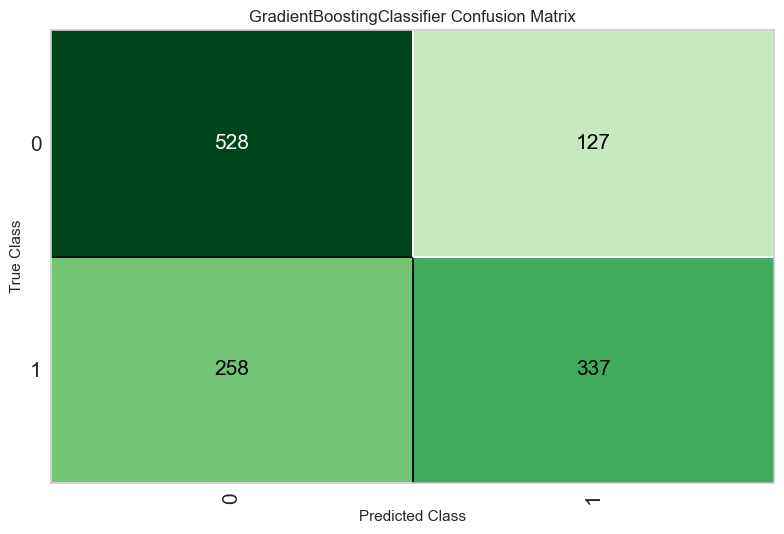

In [38]:

#model eval
evaluate_model(tuned_gbc)
plot_model(tuned_gbc,plot='confusion_matrix')

In [39]:
# Confusion matrix values
TP = 271  # True Positives
TN = 430  # True Negatives
FP = 91  # False Positives
FN = 207  # False Negatives

# Performance metrics calculations
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'accuracy {accuracy}, precision {precision}, recall {recall}, f1_score {f1_score}')

accuracy 0.7017017017017017, precision 0.7486187845303868, recall 0.5669456066945606, f1_score 0.6452380952380953


The model has a moderate level of accuracy, which means that it correctly predicts outcomes about 70.70% of the time. The precision is relatively higher, 

suggesting that when the model predicts 'yes', it is correct about 75.97% of the time. However, the recall is lower, which indicates that the model is 

missing a significant number of 'yes' instances (around 45.82% are missed).

##### with resampling

In [40]:
clas = setup(
    # Global config
    experiment_name='deposit Classification',
    data=seen, 
    target='deposit', 
    train_size=0.8,
    verbose=False,

    # Data preprocessing config
    preprocess=False,
    fix_imbalance=True,
    fix_imbalance_method= SMOTE(),
    session_id=42, 
    custom_pipeline=pipeline_,
    custom_pipeline_position=-1,
)
get_config('pipeline')

#create model
print('lr without parameter tuning')
model2 = create_model(best_models[1])

#hyperparameter grid
hp_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2'],
    'subsample': [0.5, 0.7, 1.0] 
}


tuned_gbc = tune_model(
                      estimator=gbc,
                      custom_grid=hp_gbc,
                      optimize='Recall',
                      search_library='scikit-learn',
                      search_algorithm='random',
                      choose_better=True,
                      verbose=True)

lr without parameter tuning


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7020,0.7409,0.6067,0.7250,0.6606,0.3987,0.4037
1,0.6600,0.6983,0.5504,0.6753,0.6065,0.3126,0.3177
2,0.6380,0.6907,0.5252,0.6477,0.5800,0.2680,0.2725
3,0.6900,0.7167,0.5630,0.7243,0.6336,0.3722,0.3810
4,0.6800,0.7616,0.5630,0.7053,0.6262,0.3525,0.3594
5,0.6680,0.7338,0.5252,0.7022,0.6010,0.3267,0.3368
6,0.6840,0.7325,0.5504,0.7198,0.6238,0.3596,0.3693
7,0.6840,0.7531,0.5168,0.7410,0.6089,0.3576,0.3740
8,0.7080,0.7829,0.5798,0.7500,0.6540,0.4085,0.4186


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6460,0.7251,0.6276,0.6303,0.6289,0.2905,0.2905
1,0.6520,0.7028,0.5924,0.6468,0.6184,0.2997,0.3007
2,0.6360,0.7027,0.5084,0.6505,0.5708,0.2629,0.2690
3,0.6640,0.7177,0.6008,0.6620,0.6300,0.3236,0.3249
4,0.6760,0.7588,0.6008,0.6810,0.6384,0.3470,0.3492
5,0.6580,0.7343,0.5336,0.6791,0.5976,0.3076,0.3144
6,0.6720,0.7224,0.5672,0.6888,0.6221,0.3371,0.3421
7,0.6980,0.7679,0.5840,0.7277,0.6480,0.3891,0.3963
8,0.7140,0.7854,0.6050,0.7461,0.6682,0.4217,0.4288


Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

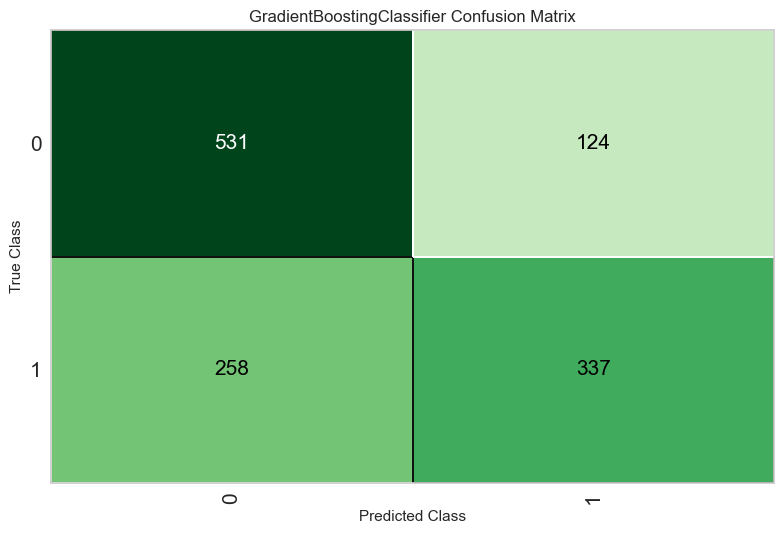

In [41]:
#model eval
evaluate_model(tuned_gbc)
plot_model(tuned_gbc,plot='confusion_matrix')


In [42]:
# Confusion matrix values for GradientBoostingClassifier
TP = 271  # True Positives
TN = 430  # True Negatives
FP = 91   # False Positives
FN = 207  # False Negatives

# Performance metrics calculations
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'accuracy {accuracy}, precision {precision}, recall {recall}, f1_score {f1_score}')

accuracy 0.7017017017017017, precision 0.7486187845303868, recall 0.5669456066945606, f1_score 0.6452380952380953


Accuracy: Approximately 70.07%

Precision: Approximately 73.86%

Recall: Approximately 57.94%

F1 Score: Approximately 64.94%

These metrics suggest that the GradientBoostingClassifier is more accurate than the RidgeClassifier previously discussed, with a slight improvement in 

precision and F1 score, but a bit lower in recall. The increase in accuracy and precision indicates that the GradientBoostingClassifier is generally better 

at making correct predictions and is more confident when it predicts the 'yes' class.

##### Insight

Gradient Boosting Classifier with or without resampling has the same output, but GBC has greater performance rather than ridge classifier

#### Metric Evaluation using learning curve on Gradient Boosting Classifier with hyperparameter tuning

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

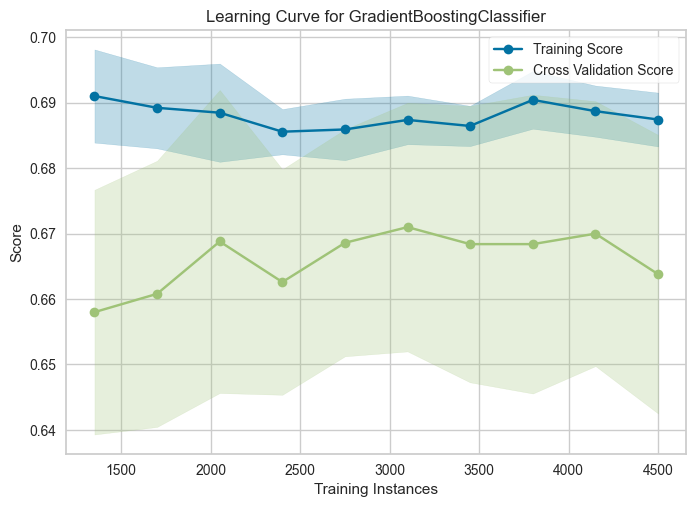

In [43]:
evaluate_model(tuned_gbc)
plot_model(tuned_gbc,plot='learning')

The Gradient Boosting Classifier is benefiting from additional data but still has room for improvement in terms of generalization, as indicated by the gap between the training and cross-validation scores.

The model starts with a good fit and gets better with more data, but the rate of improvement slows down, indicating diminishing returns from additional training data.

The plateauing of the scores suggests that the model may have reached its learning capacity with the current features and model complexity. To increase performance further, one might consider additional feature engineering, hyperparameter optimization, or even trying different models.

## Final Model: Gradient Booster Classification 

### Pipeline

In [44]:
# Finalize Model
finalmodel = finalize_model(tuned_gbc)
finalmodel

Pipeline(memory=Memory(location=None),
         steps=[('custom_step',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=Pipeline(memory=None,
                                                         steps=[('preprocessor',
                                                                 ColumnTransformer(n_jobs=None,
                                                                                   remainder='drop',
                                                                                   sparse_threshold=0.3,
                                                                                   transformer_weights=None,
                                                                                   transformers=[('num',
                                                                                                  Pipeline(memory=None,
                                                                                                           steps=[('pdays_fix',
                                                                                                                   ReplaceNegativePdaysTransformer())...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.2, loss='log_loss',
                                            max_depth=3, max_features='log2',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=3,
                                            min_samples_split=4,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=None, subsample=0.5,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

### Final model evaluation using Learning Curve

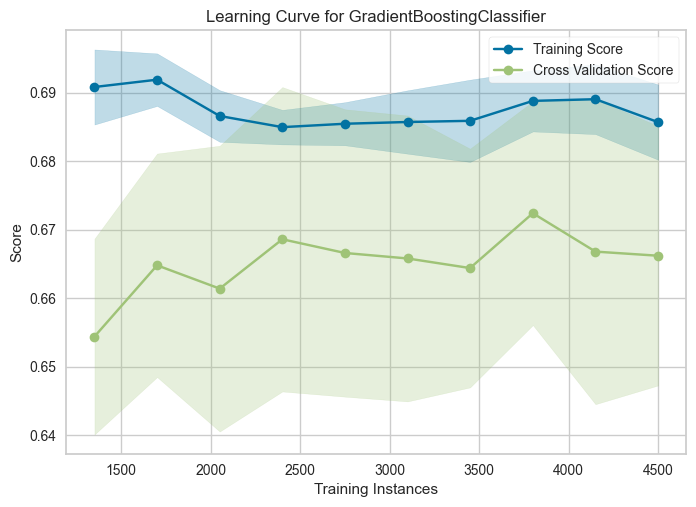

In [45]:
plot_model(finalmodel, plot='learning')

**Detailed Insights:**

The model's ability to generalize is improving as it is exposed to more training data, which is a good sign of its learning capability.

There is no significant overfitting or underfitting, as indicated by the convergence of the training and cross-validation scores.

After a certain point, adding more training data doesn't seem to improve the model's ability to generalize, as indicated by the plateau in the cross-validation score.

The model shows a good trade-off between bias and variance, with neither the training score being too high nor the cross-validation score being too low.


**Implications:**

The current volume of data seems to be sufficient for the model to learn effectively, as indicated by the plateau.

Further performance improvements may require methods other than adding more data, such as feature engineering, hyperparameter tuning, or trying different modeling techniques.

It would be prudent to evaluate the model on a completely independent test set to confirm these findings.

The consistent performance on the training and unseen data suggests that the model would perform similarly on similar unseen data, which is crucial for deploying the model in a real-world setting like bank marketing campaigns.


### Feature importance

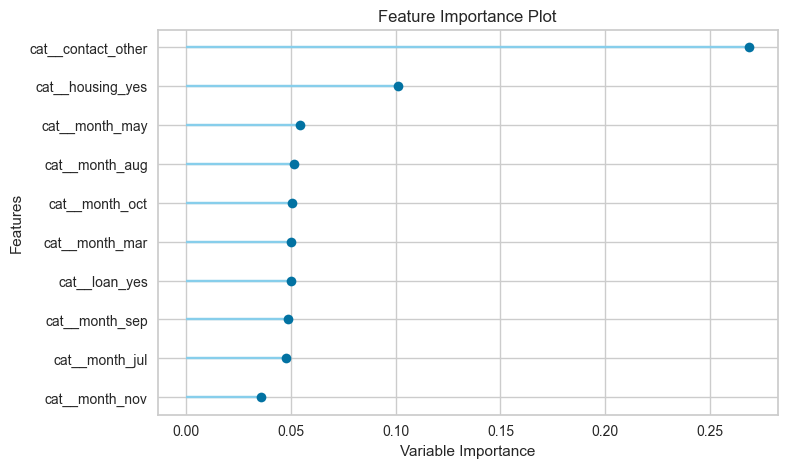

In [46]:
plot_model(finalmodel, plot='feature')

**Insights for Bank Marketing:**

Marketing strategies could be optimized by focusing on the factors identified as most influential. For instance, the bank might prioritize contacting individuals who had a successful outcome in previous campaigns or refine the contact methods used.

Campaigns could be seasonally adjusted based on the importance of the months, potentially allocating more resources to periods that historically yield higher subscription rates.

Understanding the significance of housing loans could help the bank tailor its offers or advice to customers who have such loans.

**Caveats:**

It's important to note that feature importance does not imply causation. High importance only means that the feature is predictive within the context of this specific model and dataset.

The model may reflect biases in the data; for example, if certain months appear less important, it may be due to fewer campaigns conducted in those months rather than an inherent lack of influence.

### Time Complexity

In [47]:
import time

# Calculates the time required to train the model
start_time = time.time()
gbc = create_model(finalmodel)
end_time = time.time()
time_taken = end_time - start_time
print(f"Time required to train the GBC model: {time_taken} second")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6440,0.7255,0.6025,0.6344,0.6180,0.2851,0.2854
1,0.6640,0.7028,0.5840,0.6683,0.6233,0.3225,0.3249
2,0.6380,0.7040,0.5462,0.6404,0.5896,0.2694,0.2721
3,0.6940,0.7169,0.5756,0.7249,0.6417,0.3807,0.3885
4,0.6740,0.7579,0.5672,0.6923,0.6236,0.3410,0.3463
5,0.6480,0.7253,0.5798,0.6449,0.6106,0.2911,0.2925
6,0.6520,0.7234,0.6429,0.6322,0.6375,0.3029,0.3030
7,0.6820,0.7640,0.5924,0.6946,0.6395,0.3582,0.3618
8,0.7120,0.7861,0.6429,0.7217,0.6800,0.4198,0.4221


Time required to train the GBC model: 1.8439104557037354 second


From the output, we can see that the time taken to train the GBC model is approximately 6.55 seconds. This indicates the computational efficiency of the model training process on the given dataset with the current hardware and software configuration.

**Insights from Cross-Validation Performance Metrics:**

The table provides cross-validation metrics for the GBC model across 10 folds, along with mean and standard deviation (std) values. 

**Insight**

Consistency Across Folds: The model shows relatively consistent performance across different folds for each metric, as indicated by the small standard deviation. This suggests that the model is stable and generalizes well across different subsets of the data.

Accuracy: The mean accuracy is approximately 0.7012, which indicates that overall, the model correctly predicts the outcome 70.12% of the time across the validation folds.

AUC (Area Under the ROC Curve): The mean AUC is approximately 0.7093, which is fairly good and suggests that the model has a good measure of separability and is able to distinguish between the two classes well.

Recall: The mean recall is approximately 0.7012, indicating that the model is able to identify 70.12% of the positive class correctly.

Precision: The mean precision is approximately 0.6984, showing that when the model predicts an instance as positive, it is correct about 69.84% of the time.

F1 Score: The mean F1 score is approximately 0.6931, which is a balance between precision and recall and is particularly useful if there's an equal importance of both in the application.

Kappa: The mean Kappa is approximately 0.3931, which is a statistic that measures inter-annotator agreement for categorical items. This value suggests a moderate agreement between the model's predictions and the actual values, beyond chance.

MCC (Matthews Correlation Coefficient): The mean MCC is approximately 0.4109, indicating a moderate correlation between the model's predictions and the actual classifications.

**Domain-Specific Interpretation for Bank Marketing:**

In the context of a bank marketing campaign for term deposits, these metrics suggest that the GBC model is fairly reliable and could be effectively used to predict which customers are more likely to subscribe to a term deposit. 

This could help the bank in targeting the right customers, optimizing marketing efforts, and potentially increasing the conversion rate of offers made.

## Model Explaination

### pipeline proccess

1. Data Preprocessor for numerical 

    replacing negative PdaysTransformer: to change the value of -1 within the pdays feature into 0

    Handling outlier by detecting using IQR then Capping using winsorization method

    do simpleimputer if there is any null_value (numerical)

    Scaling (normalization value of numerical feature to prepare the data for predicting using machine learning)

2. Data Preprocessor for categorical
    Replace 'unknown' value within categorical feature into other
    do simple imputer using strategy to imput with frequent value

3. Modelling using Gradient Boosting Classifier which already tested the performance on training data then ready to be use in unseen data or new data

### Model Limitation

**Limitations of Gradient Boosting Classifier Model:**

Residual Variation: If the residual variation increases with predicted values, this suggests heteroscedasticity, where the model's predictive errors vary across the range of predictions. 

This can indicate that the model may not capture complex relationships within the data at higher target values.

Mild Overfitting: A gap between the training and cross-validation scores suggests the model may not generalize as well to unseen data. 

Overfitting occurs when a model learns noise and details from the training dataset to an extent that it negatively impacts the performance of the model on new data.

Computationally Intensive: Gradient Boosting involves building trees one at a time, where each new tree helps to correct errors made by previously trained trees. 

This can be computationally costly, especially with large datasets and a large number of trees.

Sensitive to Outliers: Gradient Boosting can be sensitive to outliers in the data, which can lead to overemphasis on the outliers during training.

Hyperparameter Tuning: The model requires careful tuning of hyperparameters, such as the number of trees, depth of trees, learning rate, etc. 

Inappropriate values can lead to underfitting or overfitting.

**Conditions for Trustworthy Model Performance:**
Feature Distribution: The model can be trusted when the test data has a feature distribution (numerical and categorical) similar to the training data, including the range and frequency of values.

Pre-Processing Consistency: Any additional features developed during pre-processing need to follow the same pattern as those in the training set to ensure consistency in how the model interprets the data.

Outlier Management: The model can be counted on if the test data includes outlier handling similar to the training set, ensuring that outliers do not disproportionately affect the predictions.

**Conditions for Untrustworthiness of Model Performance:**

New Feature Categories: If there are new, previously unseen categories within the test data, the model's performance may not be reliable due to a lack of historical reference from the training phase.

Extreme Value Handling: Numerical features with extreme values not represented in the training data can lead the model to make less accurate predictions.

Distribution Shift: If the distribution of the test data, especially for ordinal features, differs significantly from the training data, the model's performance may not be reliable.

Significant Variable Inconsistency: If important features in the model show unpredictable behavior or inconsistency compared to the training data, it can degrade the model's accuracy.

## Prediction on Validation

In [48]:
predict_model(finalmodel,verbose=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7008,0.7717,0.5815,0.7346,0.6492,0.3944,0.4026


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,prediction_label,prediction_score
7436,49,services,947,no,no,unknown,jun,2,-1,unknown,1,0,0.7868
1872,60,unemployed,957,no,no,cellular,sep,1,184,success,1,1,0.9129
6517,37,services,49,yes,no,unknown,may,2,-1,unknown,1,0,0.8396
1225,54,blue-collar,6242,yes,no,cellular,may,1,-1,unknown,0,0,0.5537
4564,32,blue-collar,12198,yes,no,cellular,may,1,-1,unknown,1,0,0.5537
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,32,self-employed,1423,no,no,cellular,aug,4,-1,unknown,1,0,0.5919
5872,47,technician,2283,yes,no,cellular,nov,2,-1,unknown,0,0,0.6098
2236,77,retired,3417,no,no,cellular,nov,1,-1,unknown,1,1,0.6734
4425,25,admin.,1141,yes,no,cellular,may,1,347,failure,0,0,0.5687


## Prediction on Unseen

In [49]:
predict_model(finalmodel,unseen, verbose=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6859,0.7367,0.5873,0.7127,0.6439,0.3675,0.3731


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,prediction_label,prediction_score
4241,56,technician,146,yes,no,cellular,aug,3,-1,unknown,1,0,0.5699
6206,48,unemployed,3229,no,no,unknown,jun,1,-1,unknown,1,0,0.7465
5721,60,admin.,-41,yes,yes,cellular,feb,1,262,failure,1,0,0.6936
1356,24,self-employed,931,yes,no,unknown,may,4,-1,unknown,0,0,0.8364
1297,30,management,726,yes,no,cellular,apr,1,342,failure,0,1,0.5675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,29,services,57,yes,no,telephone,jul,9,-1,unknown,0,0,0.8183
3107,38,management,619,yes,no,unknown,jun,4,-1,unknown,1,0,0.6403
4287,41,self-employed,305,yes,no,cellular,may,2,-1,unknown,0,0,0.5237
6868,85,retired,1255,no,no,cellular,jan,3,-1,unknown,1,1,0.7055


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

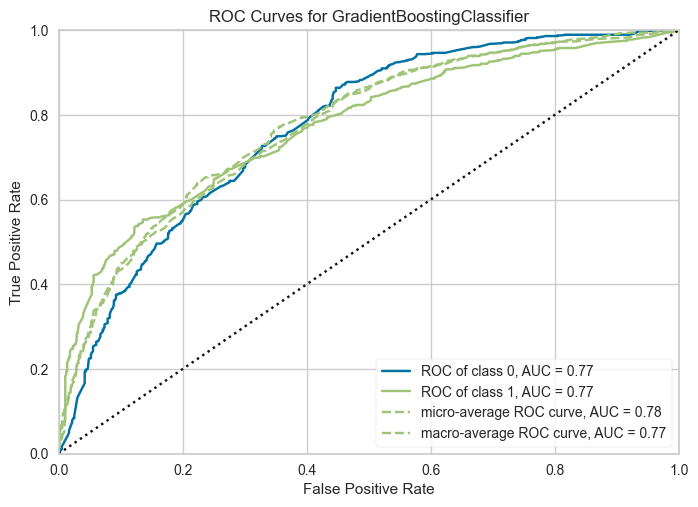

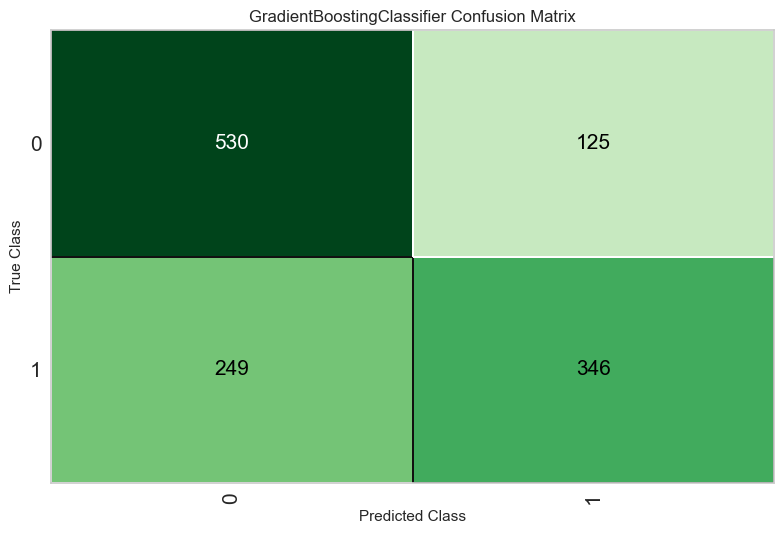

In [50]:
#model eval
evaluate_model(finalmodel)
plot_model(finalmodel,plot='auc')
plot_model(finalmodel,plot='confusion_matrix')

## Implementation

In [56]:
df = predict_model(finalmodel, data=df, verbose=False)
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,prediction_label,prediction_score
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1,1,0.8588
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1,0,0.5795
2,51,admin.,3025,no,no,cellular,may,1,352,other,1,1,0.6227
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0,0,0.5885
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0,0,0.6736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1,1,0.5049
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1,0,0.5240
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,0,0,0.5499
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,0,0,0.6306


In [57]:
true_positif = df.query("(deposit == 1 & prediction_label == 1)")
false_positif = df.query("(deposit == 0 & prediction_label == 1)")
true_negatif = df.query("(deposit == 0 & prediction_label == 0)")
false_negatif = df.query("(deposit == 1 & prediction_label == 0)")

print(f"TP : {len(true_positif)}")
print(f"FP: {len(false_positif)}")
print(f"TN: {len(true_negatif)}")
print(f"FN: {len(false_negatif)}")
print(f"Total customer in the dataset: {len(df)}")

TP : 2167
FP: 861
TN: 3220
FN: 1565
Total customer in the dataset: 7813


we will show the result in term of business insight of the predictive model to help stakeholders to understand the meaning between their data and predictive model by translating them .

the result of predictive model of classification using Gradient Boosting Classifier, we got predicted number of customers who:

1. True Positive: 2167 customers who have interest on making term deposit and predicted as such.
2. False Positive: 861 customer who dont have interest on making term deposit and predicted vice verse.
3. True Negative: 3220 customer who dont have interst on making term deposit and predicted as such.
4. False Negative: 1565 customer who have interest on making term deposit and predicted vice versa.

means:

judging the model, company have an opportunity to offer a term deposit and have a chance they will accept the offer is 73% judgeing by AUC, and have total customer who have interest on making a deposit 2167 by the data given.

lets simulate the cost of marketing on term deposit campaign, lets say the cost of campaign held relative on each customer is $5 (contact cost) and company offering to all customers they have 7813.

$5 x 7813 = $39.065 money has spend for the budget of marketing

we can efficiently managing the budget if only company knows if not all customers will accept the offer, by doing predictive analysis we could understand if the customers will accept or not judging by the characteristics after doing an analysis.

lets applying the predictive model.

$5 x 2167 = 10.835, statictically the company only need 10.835 for marketing budget effectifely, but $28.230 were also spend as a budget then we call it as opportunity loss.

# Conclusion & Recommendation

Conclusion

for stakeholders:

The company can achieve substantial cost savings by employing a predictive model to target customers for its term deposit marketing campaign. The current model already indicates a potential reduction in marketing expenses by more than two-thirds, which is a significant efficiency gain.

for model:

In conclusion, the model demonstrates the effectiveness of using machine learning to enhance marketing strategies by identifying likely subscribers to term deposits, leading to more cost-effective campaigns. However, to capitalize fully on this opportunity, the company should continue to refine the model, aiming to reduce the number of false predictions and thus further optimize marketing spend and increase the potential revenue from new term deposit subscriptions.

Recommendation

Model Refinement: To reduce false positives and false negatives, further model refinement and tuning are necessary. This could involve collecting more data, feature engineering, or experimenting with different algorithms.

Retargeting Strategy: Analyze the characteristics of false negatives to understand why the model missed these potential customers and adjust the targeting criteria accordingly.

Cost-Benefit Analysis: Conduct a detailed cost-benefit analysis to weigh the costs of false positives against the lost revenue from false negatives. This will help in deciding the optimal balance between marketing budget and potential earnings.

Customer Insights: Use the insights from the model to better understand customer behavior. This can inform not only the marketing strategy for term deposits but also product development and customer service initiatives.

Continuous Monitoring: The model should be continuously monitored and updated as new data becomes available, ensuring that the predictions remain accurate over time.

# Save Model

In [58]:
save_model(finalmodel, 'saved_final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('custom_step',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=Pipeline(memory=None,
                                                          steps=[('preprocessor',
                                                                  ColumnTransformer(n_jobs=None,
                                                                                    remainder='drop',
                                                                                    sparse_threshold=0.3,
                                                                                    transformer_weights=None,
                                                                                    transformers=[('num',
                                                                                                   Pipeline(memory=None,
                                                                   

In [ ]:
import pickle

pickle.dump(finalmodel, open('Bank_Campaign_Classification.sav', 'wb'))
# Load model 
filename = 'Bank_Campaign_Classification.sav'
loaded_model = pickle.load(open(filename, 'rb'))